<h1 align="center"> Python Essentials: Data Visualization.</h1>

    <Tyler Humpherys>
    <Math 345>
    <11/30/21>

In [21]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as la
import scipy

In [8]:
plt.rcParams["figure.dpi"] = 300     # Raise figure quality.

### Problem 1

The file `anscombe.npy` contains Anscombe’s quartet.
For each section of the quartet,
- Plot the data as a scatter plot on the box [0, 20] × [0, 13].
- Use `scipy.stats.linregress()` to calculate the slope and intercept of the least squares regression line for the data and its correlation coefficient (the first three return values).
- Plot the least squares regression line over the scatter plot on the domain $x\in[0,20]$.
- Report the mean and variance in $x$ and $y$, the slope and intercept of the regression line, and the correlation coefficient. Compare these statistics to those of the other sections.
- Describe how the section is similar to the others and how it is different.

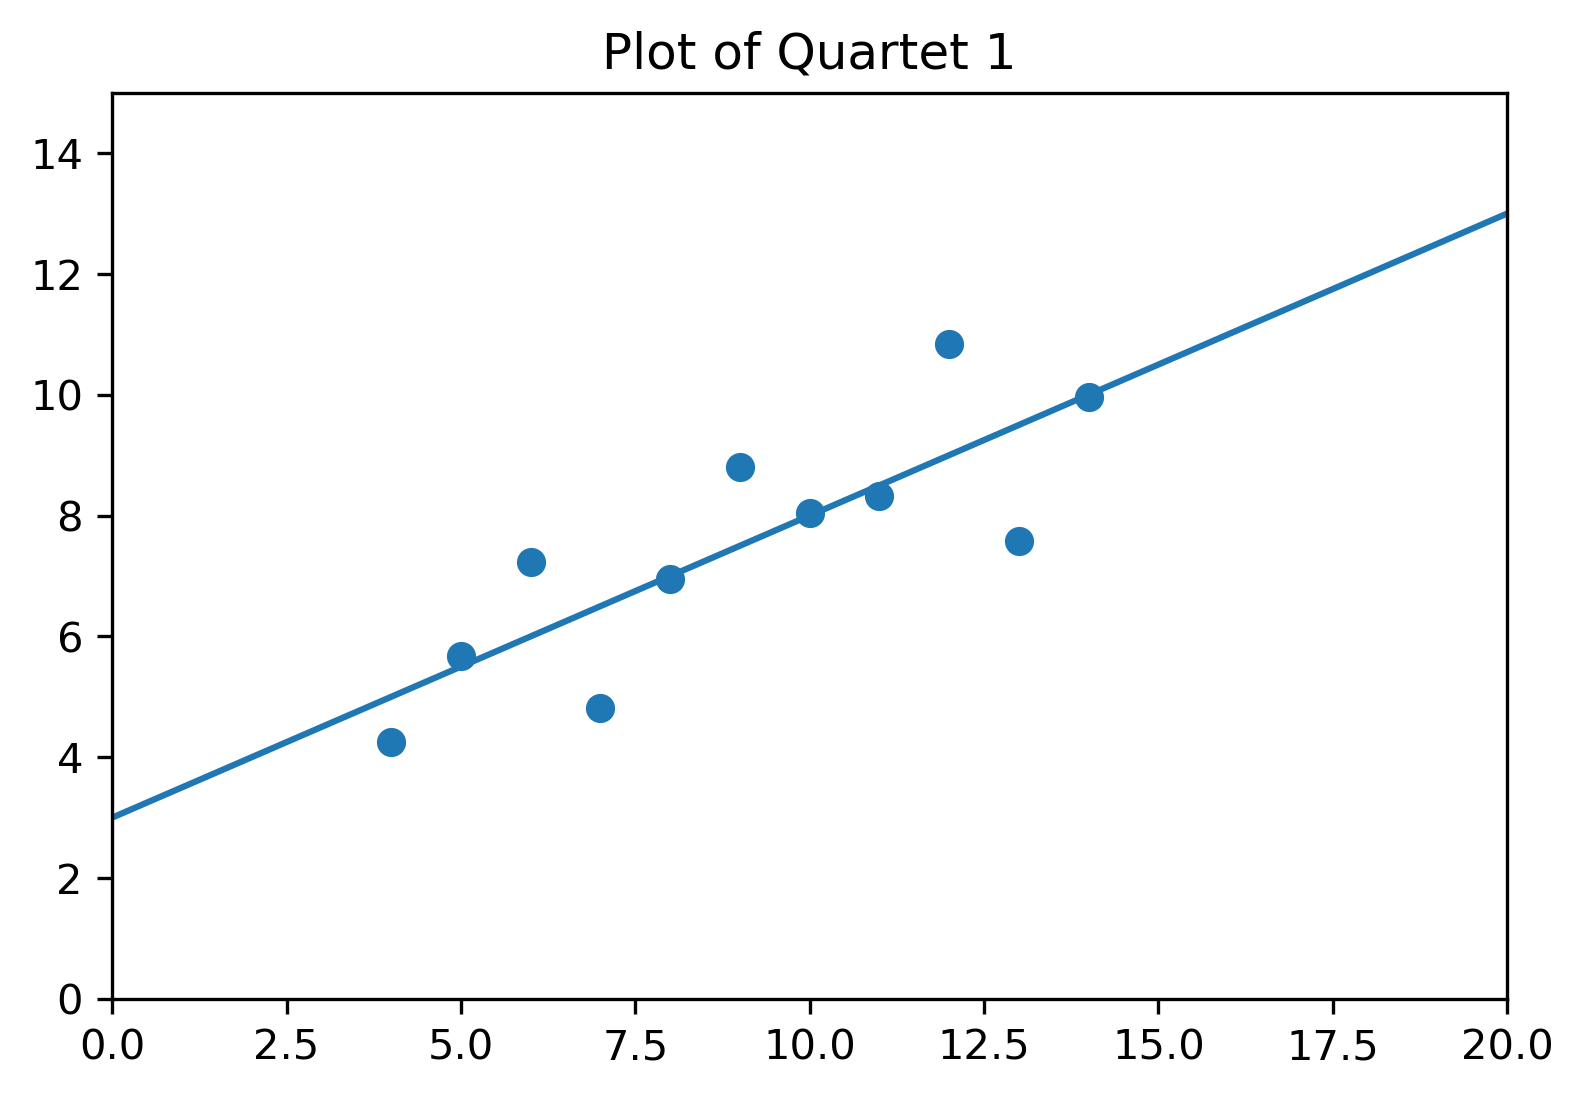

Mean in x:  9.0
Mean in y:  7.500909090909093
Variance in x:  10.0
Variance in y:  3.7520628099173554
Slope of regression line:  0.5000909090909091
Y-intercept of regression line:  3.0000909090909103
Correlation Coefficient:  0.8164205163448399
Description: Each quartet has approximately the same mean and variance in x and y, the same slope and intercept of the regression line, and the same correlation coefficient.


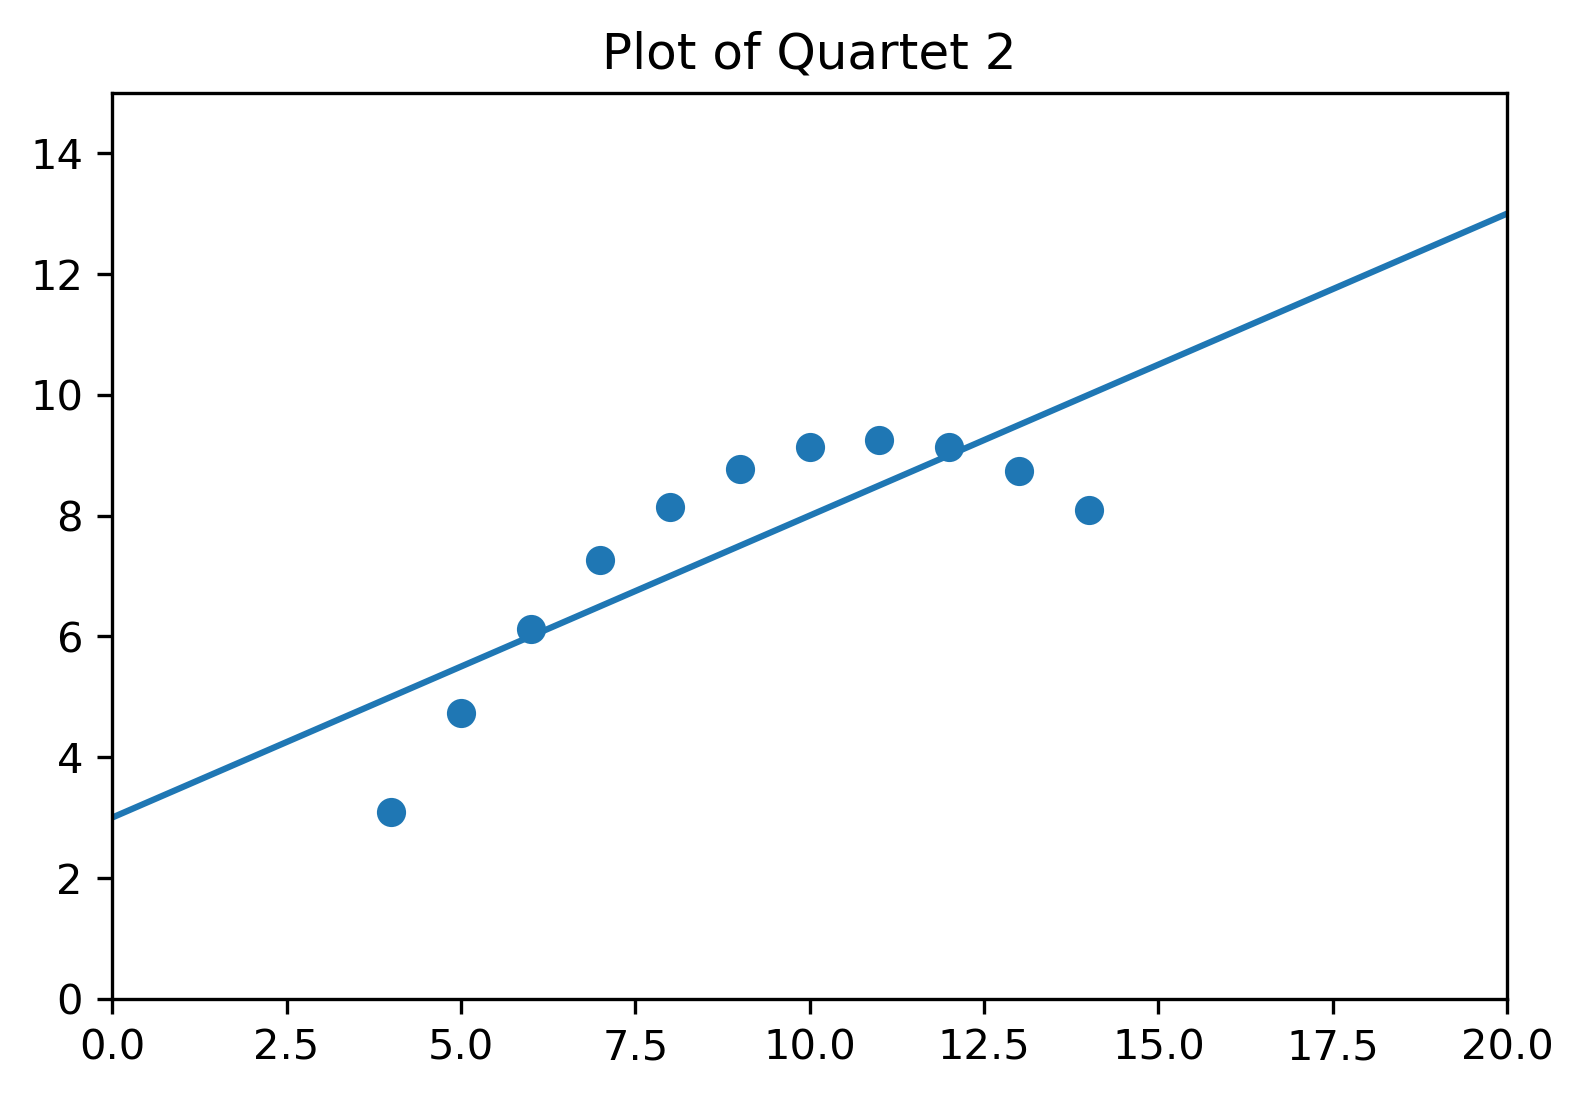

Mean in x:  9.0
Mean in y:  7.50090909090909
Variance in x:  10.0
Variance in y:  3.752390082644628
Slope of regression line:  0.5000000000000001
Y-intercept of regression line:  3.000909090909089
Correlation Coefficient:  0.816236506000243
Description: Each quartet has approximately the same mean and variance in x and y, the same slope and intercept of the regression line, and the same correlation coefficient.


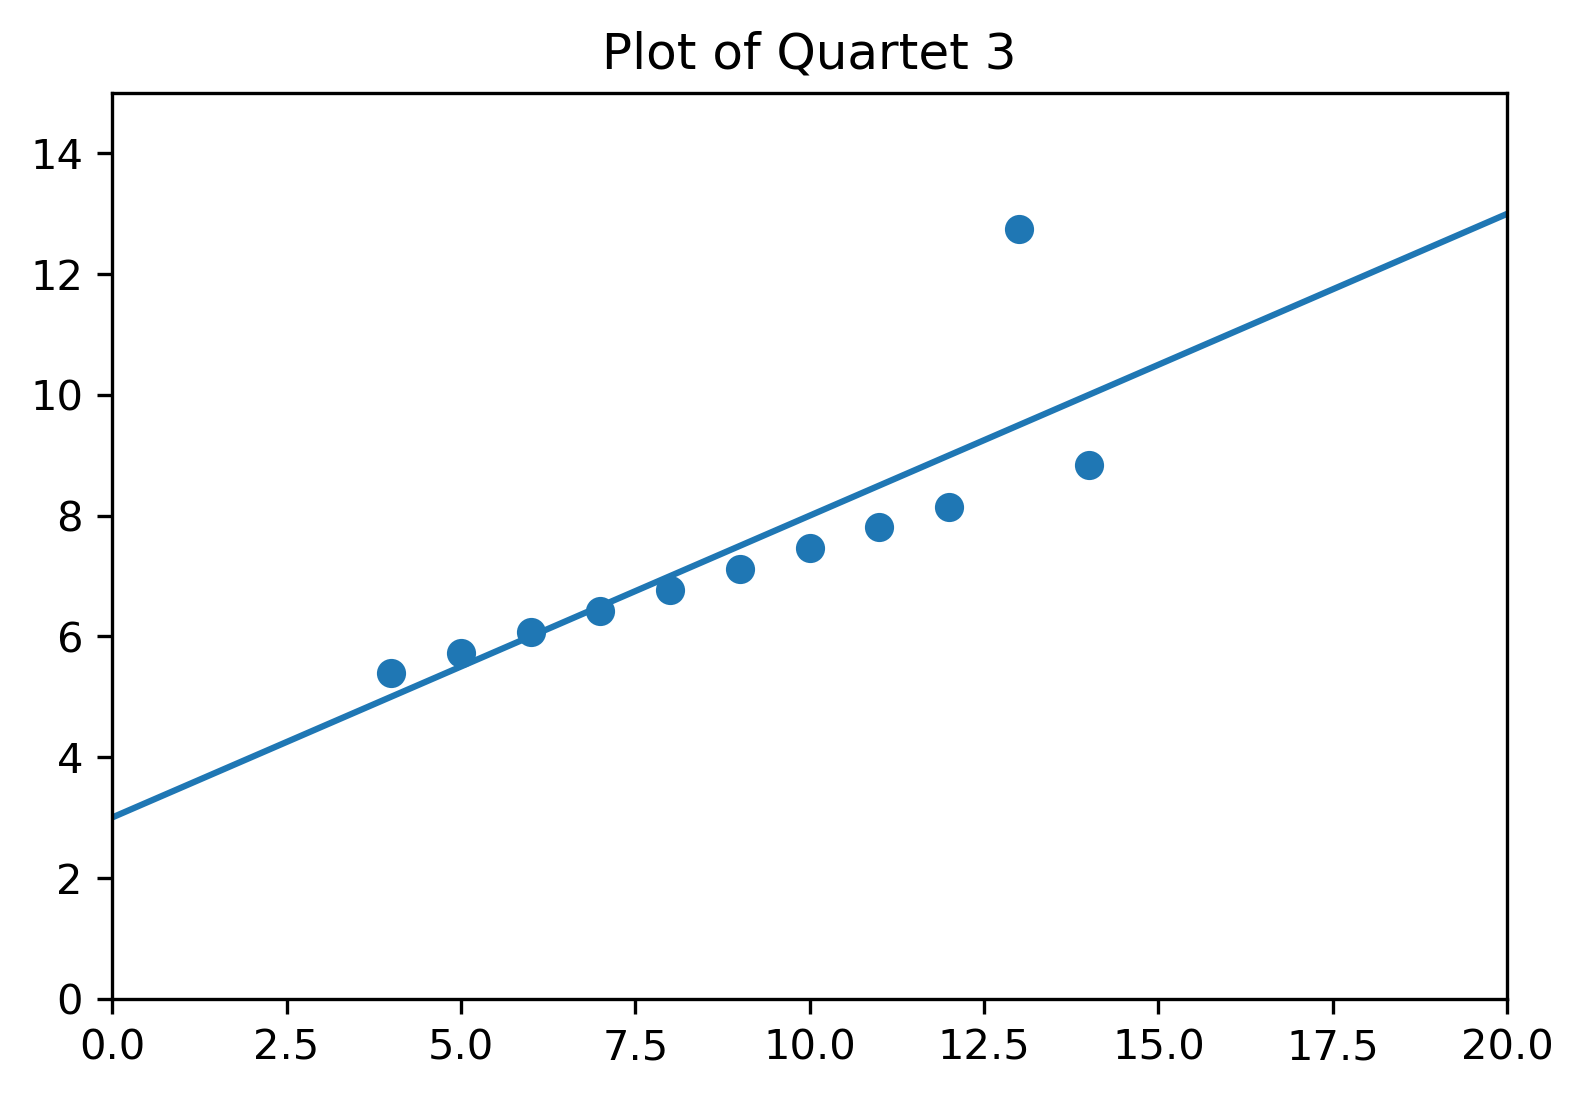

Mean in x:  9.0
Mean in y:  7.5
Variance in x:  10.0
Variance in y:  3.747836363636364
Slope of regression line:  0.4997272727272729
Y-intercept of regression line:  3.002454545454544
Correlation Coefficient:  0.8162867394895984
Description: Each quartet has approximately the same mean and variance in x and y, the same slope and intercept of the regression line, and the same correlation coefficient.


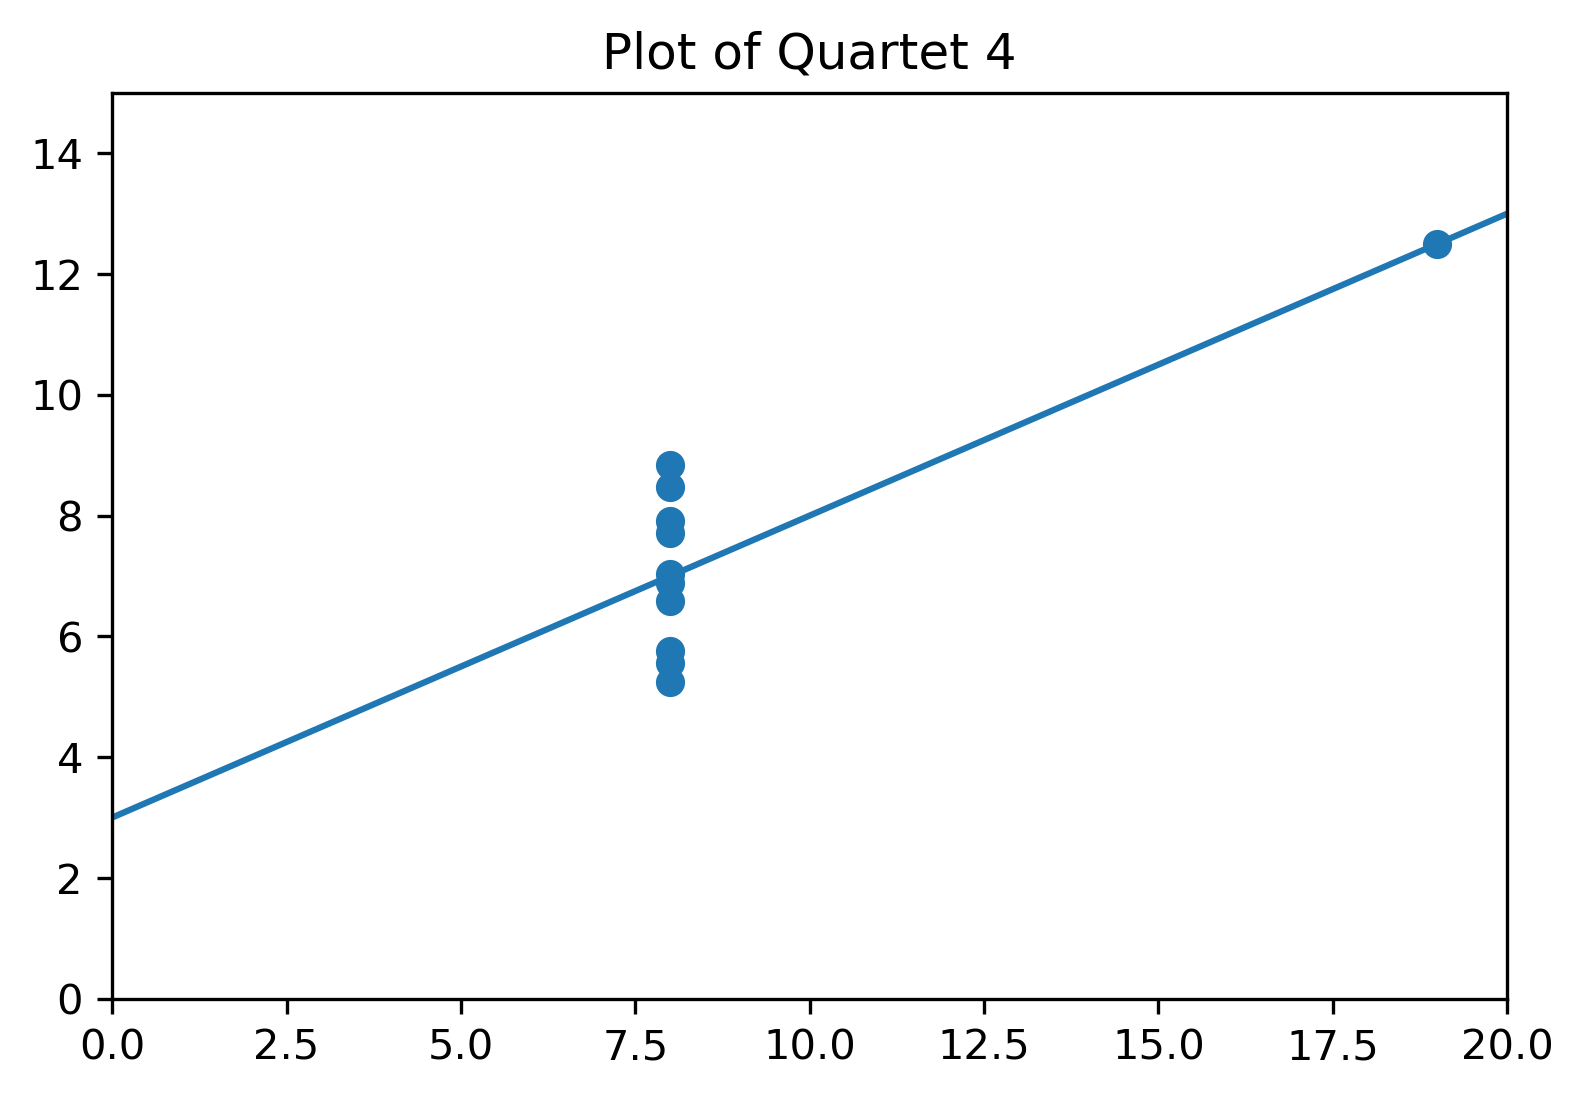

Mean in x:  9.0
Mean in y:  7.500909090909091
Variance in x:  10.0
Variance in y:  3.7484082644628103
Slope of regression line:  0.4999090909090909
Y-intercept of regression line:  3.0017272727272726
Correlation Coefficient:  0.8165214368885028
Description: Each quartet has approximately the same mean and variance in x and y, the same slope and intercept of the regression line, and the same correlation coefficient.


In [20]:
A = np.load("anscombe.npy")

#For each quartet
for i in range(4):
    
    #Get the x and y columns from A
    x = A[:, 2*i]
    y = A[:, 2*i + 1]
    
    #Get the slope, and y intercept from the least squares regression line
    slope, y_int, rvalue, pvalue, stderr = la.linregress(x, y)
    
    #Create linspace to plot on
    t = np.linspace(0, 20, 100)
    
    #Plot data with regression line
    plt.scatter(x, y)
    plt.plot(t, slope*t + y_int)
    plt.title(f"Plot of Quartet {i+1}")
    plt.xlim(0, 20)
    plt.ylim(0,15)
    plt.show()
    
    #Report and compare the mean and variance, and other statistics for each quartet
    print("Mean in x: ", np.mean(x))
    print("Mean in y: ", np.mean(y))
    print("Variance in x: ", np.var(x))
    print("Variance in y: ", np.var(y))
    print("Slope of regression line: ", slope)
    print("Y-intercept of regression line: ", y_int)
    print("Correlation Coefficient: ", rvalue)
    print("Description: Each quartet has approximately the same mean and variance in x and y, the same slope and intercept of the regression line, and the same correlation coefficient.")
    

### Problem 2
The $n + 1$ Bernstein basis polynomials of degree $n$ are defined as follows.

$$b_{n,v}(x) = \binom{n}{v}x^v(1-x)^{n-v},\quad v=0,\ 1,\ \ldots,\ n$$

Plot the first $10$ Bernstein basis polynomials ($n = 0,\ 1,\ 2,\ 3$) as small multiples on the domain $[0, 1] \times [0, 1]$.
Label the subplots for clarity, adjust tick marks and labels for simplicity, and set the window limits of
each plot to be the same.
Consider arranging the subplots so that the rows correspond with $n$ and the columns with $v$.

(Hint: The constant $\binom{n}{v} = \frac{n!}{v!(n-v)!}$ is called the binomial coefficient and can be efficiently computed with `scipy.special.binom()` or `scipy.misc.comb()`.)

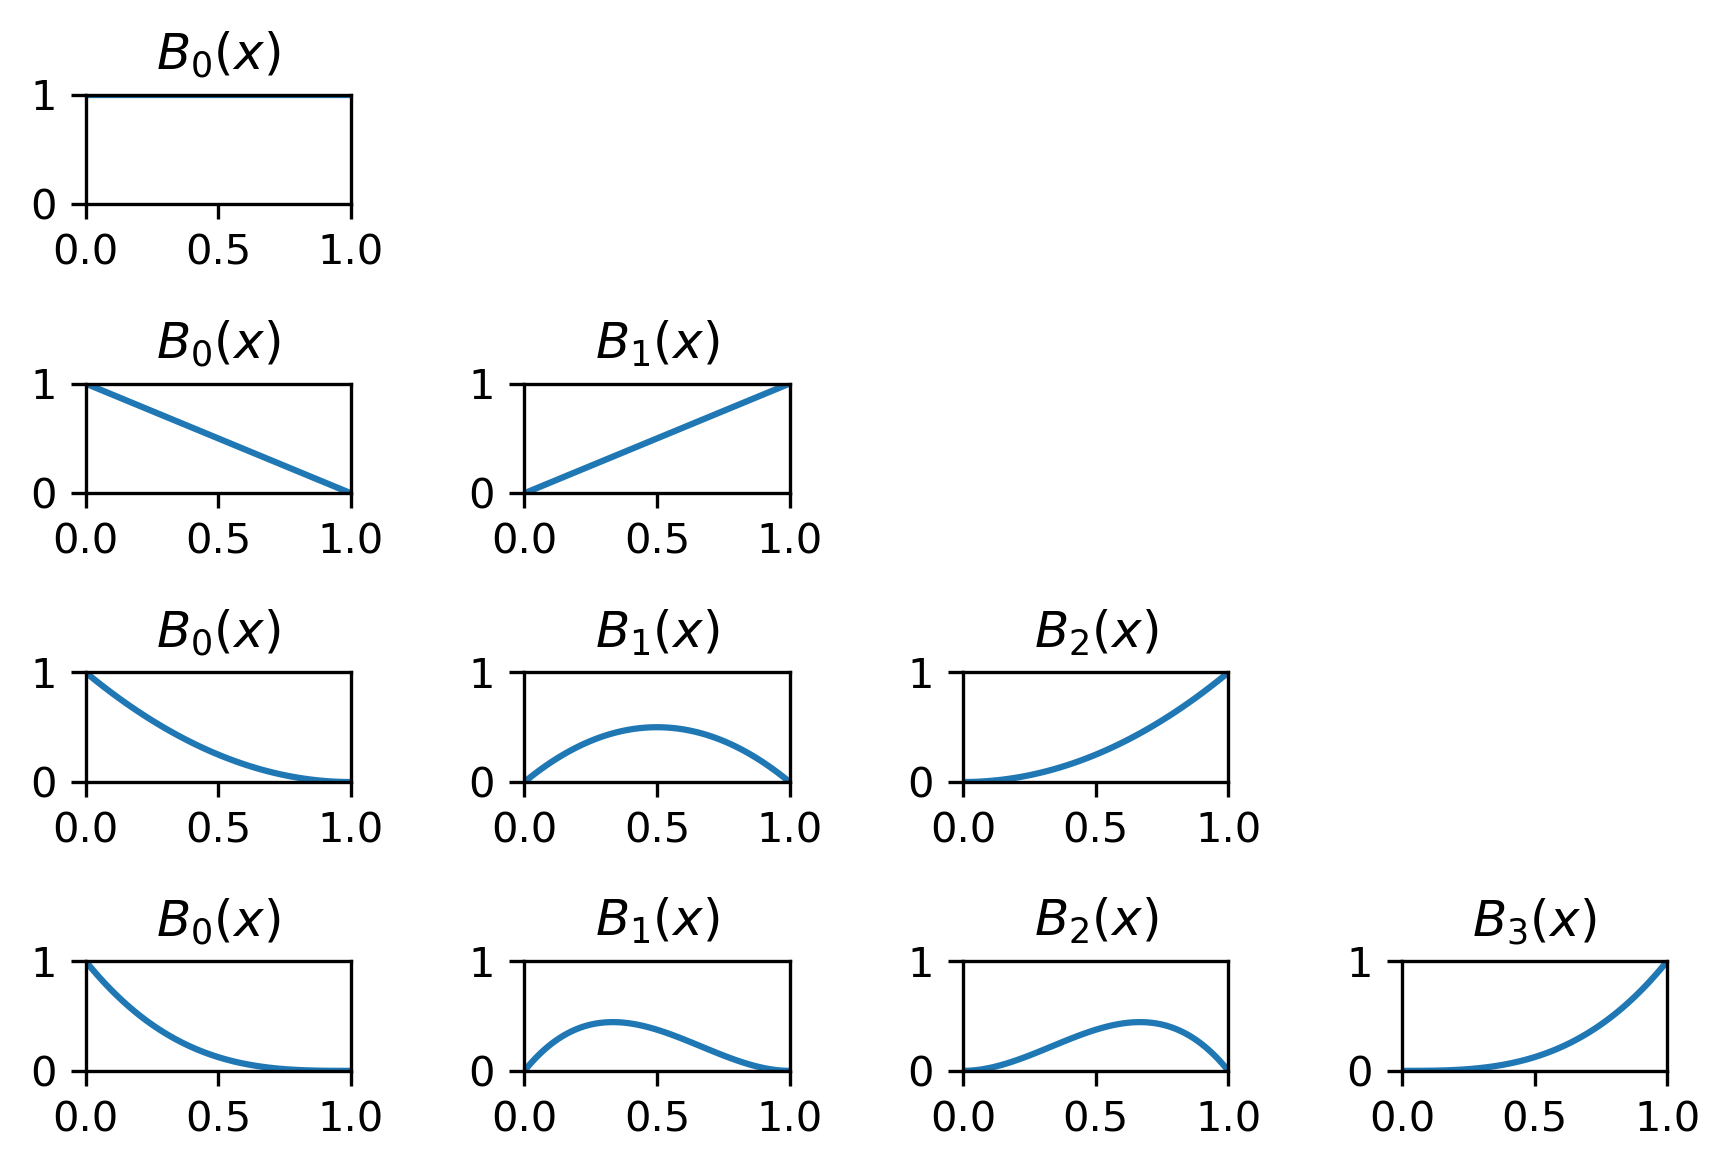

In [26]:
#Create linspace to plot from 0 to 1
t = np.linspace(0, 1, 100)

for n in range(4):
    for v in range(n+1):
        #Compute the binomial coefficient
        binomial = scipy.special.comb(n, v)
        
        #Compute the Bernstein polynomial
        bern = lambda x: binomial * (x**v) * (1-x)**(n-v)
        
        #Plot the polynomial
        plt.subplot(4, 4, 4*n+v+1)
        plt.plot(t, bern(t))
        plt.title(r"$B_{}(x)$".format(v))
        plt.xlim(0, 1)
        plt.ylim(0, 1)

plt.tight_layout()
plt.show()

### Problem 3

The file `MLB.npy` contains measurements from over 1,000 recent Major League Baseball players, compiled by UCLA.
Each row in the array represents a different player; the columns are the player’s height (in inches), weight (in pounds), and age (in years), in that order.

Create several visualizations to show the correlations between height, weight, and age in the MLB data set.
Use at least one scatter plot.
Adjust the marker size, plot a regression line, change the window limits, and use small multiples where appropriate.

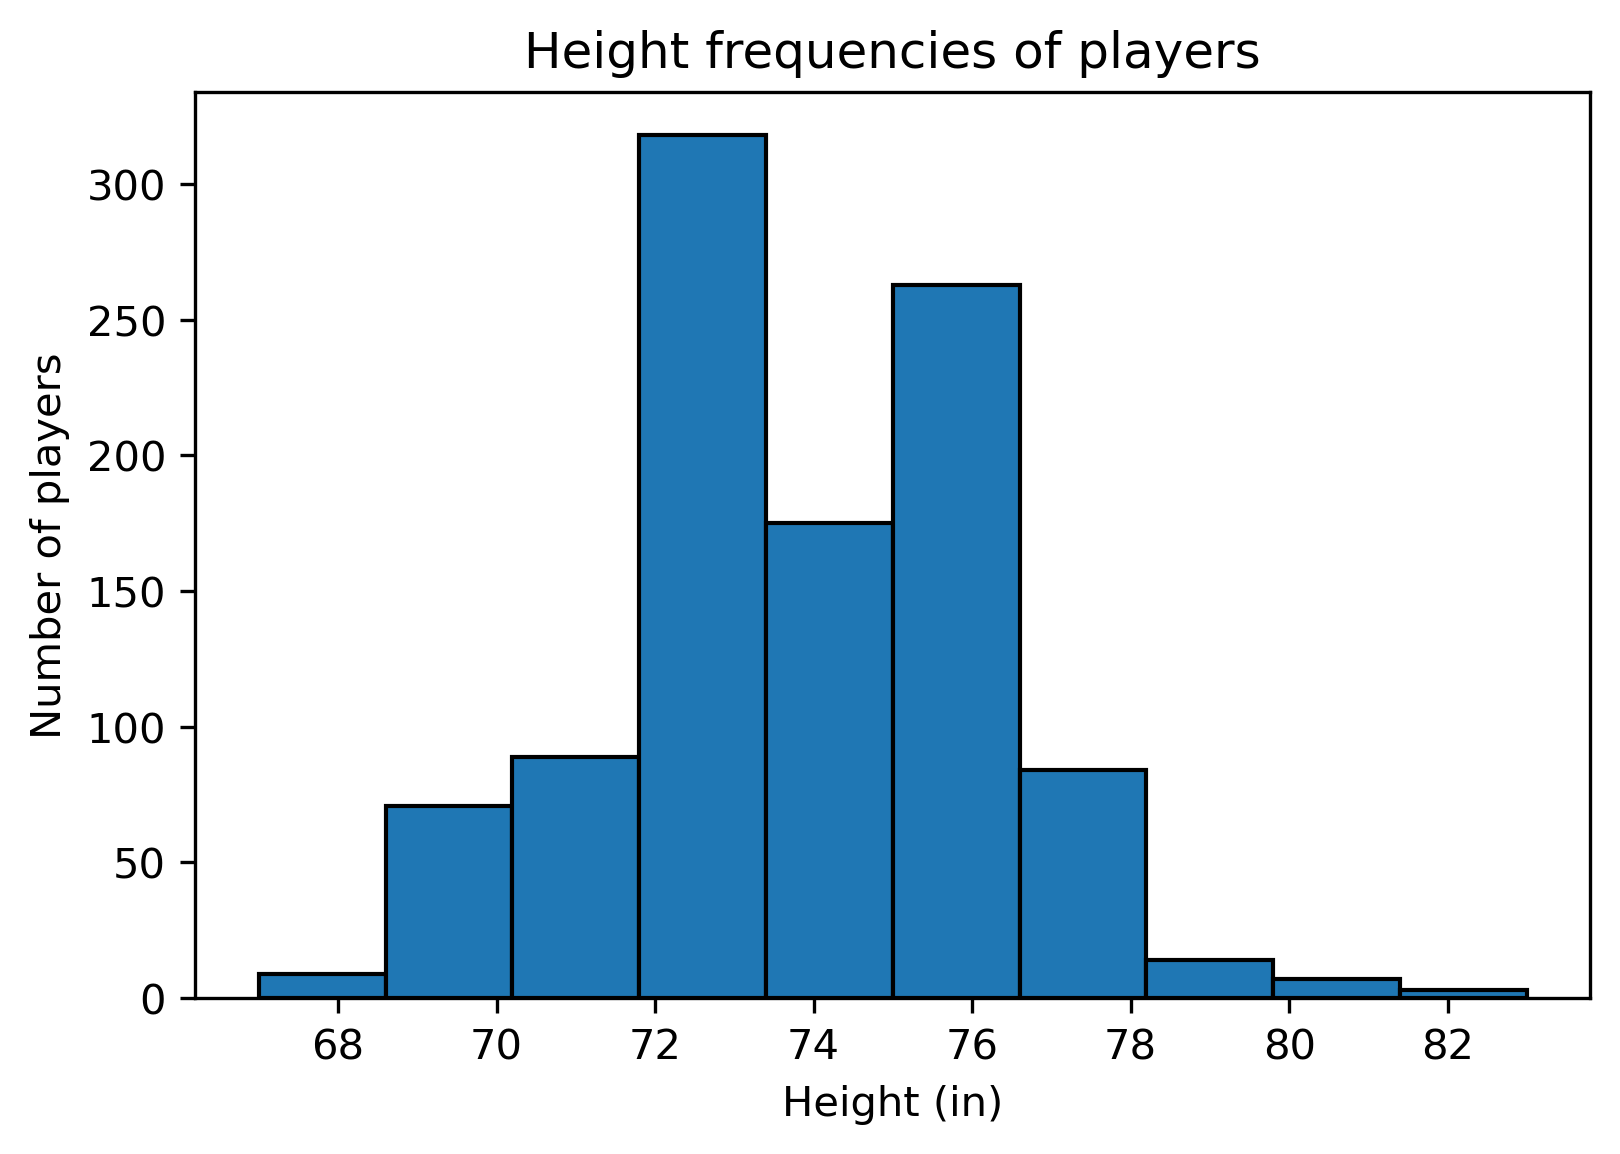

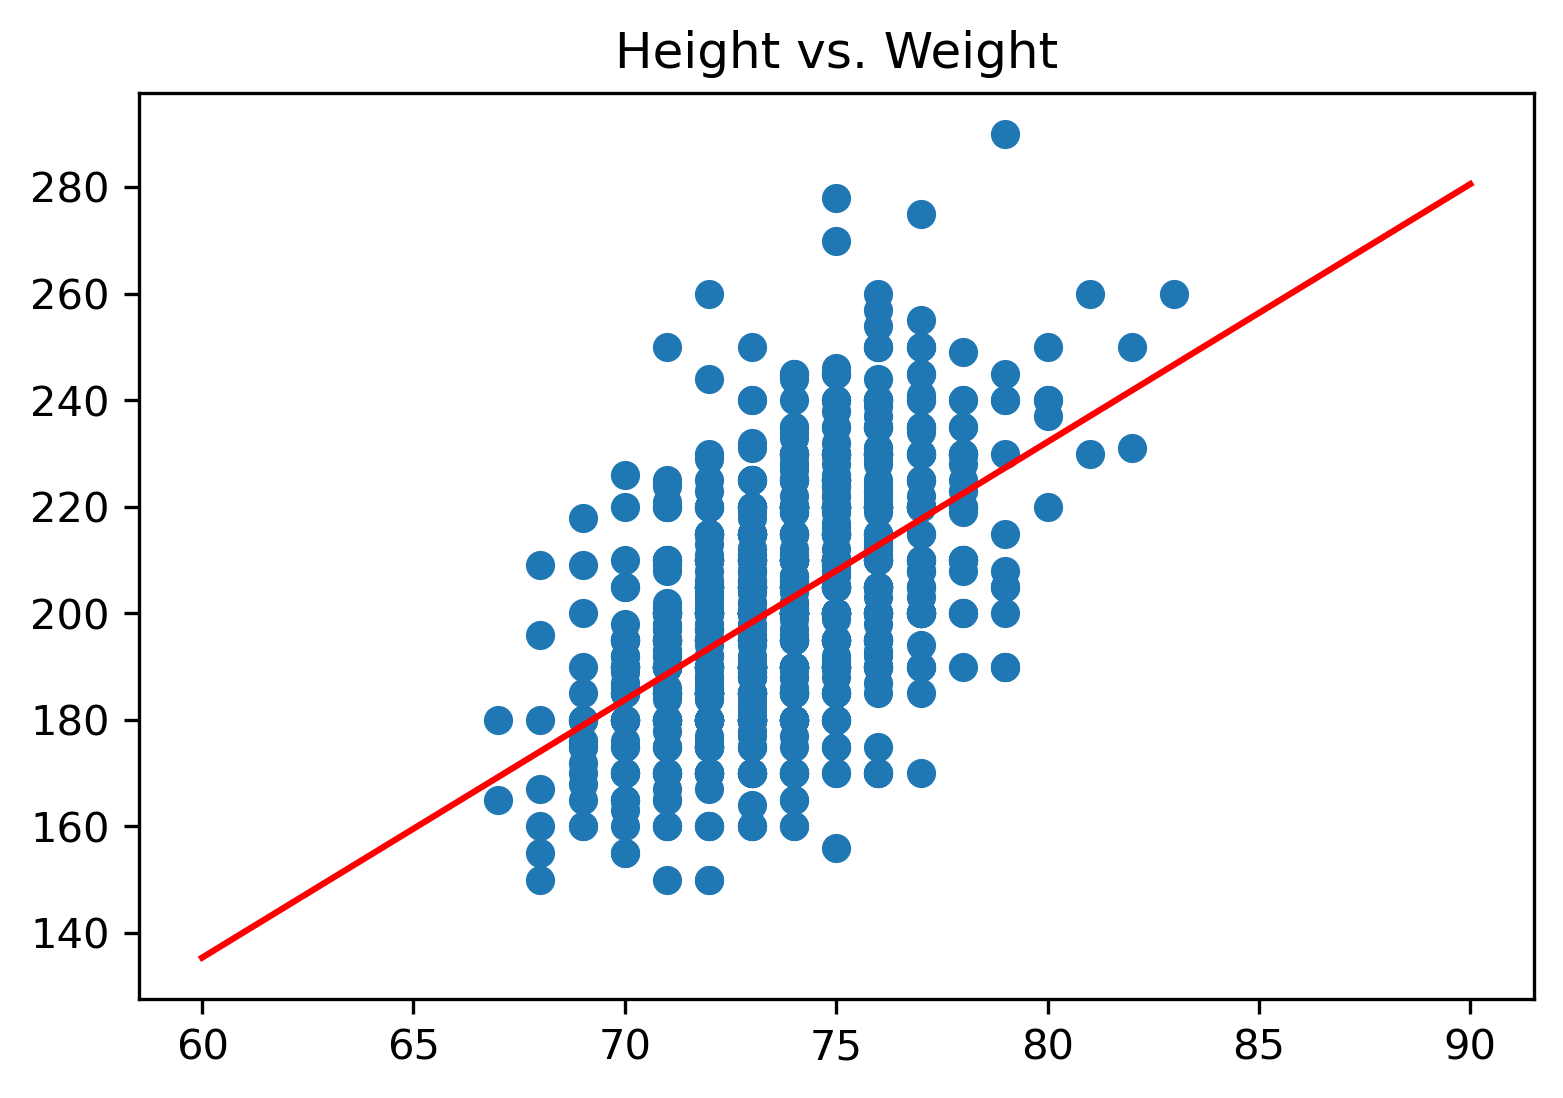

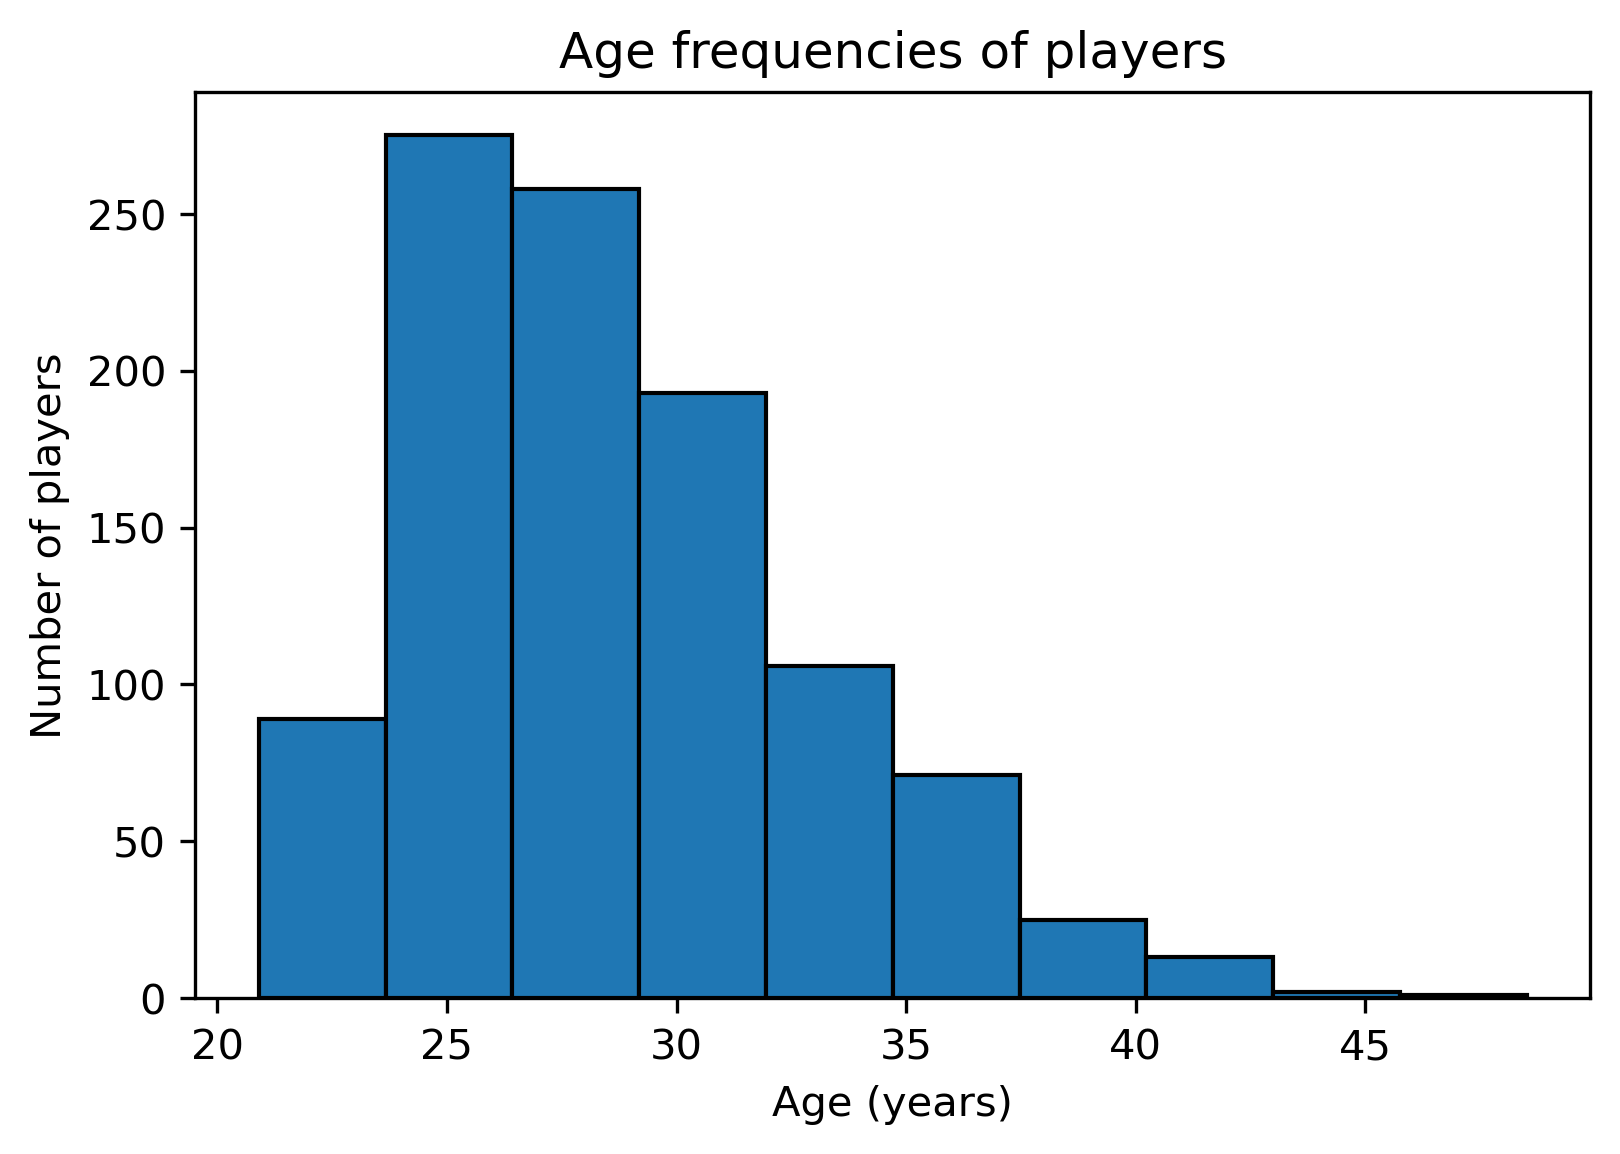

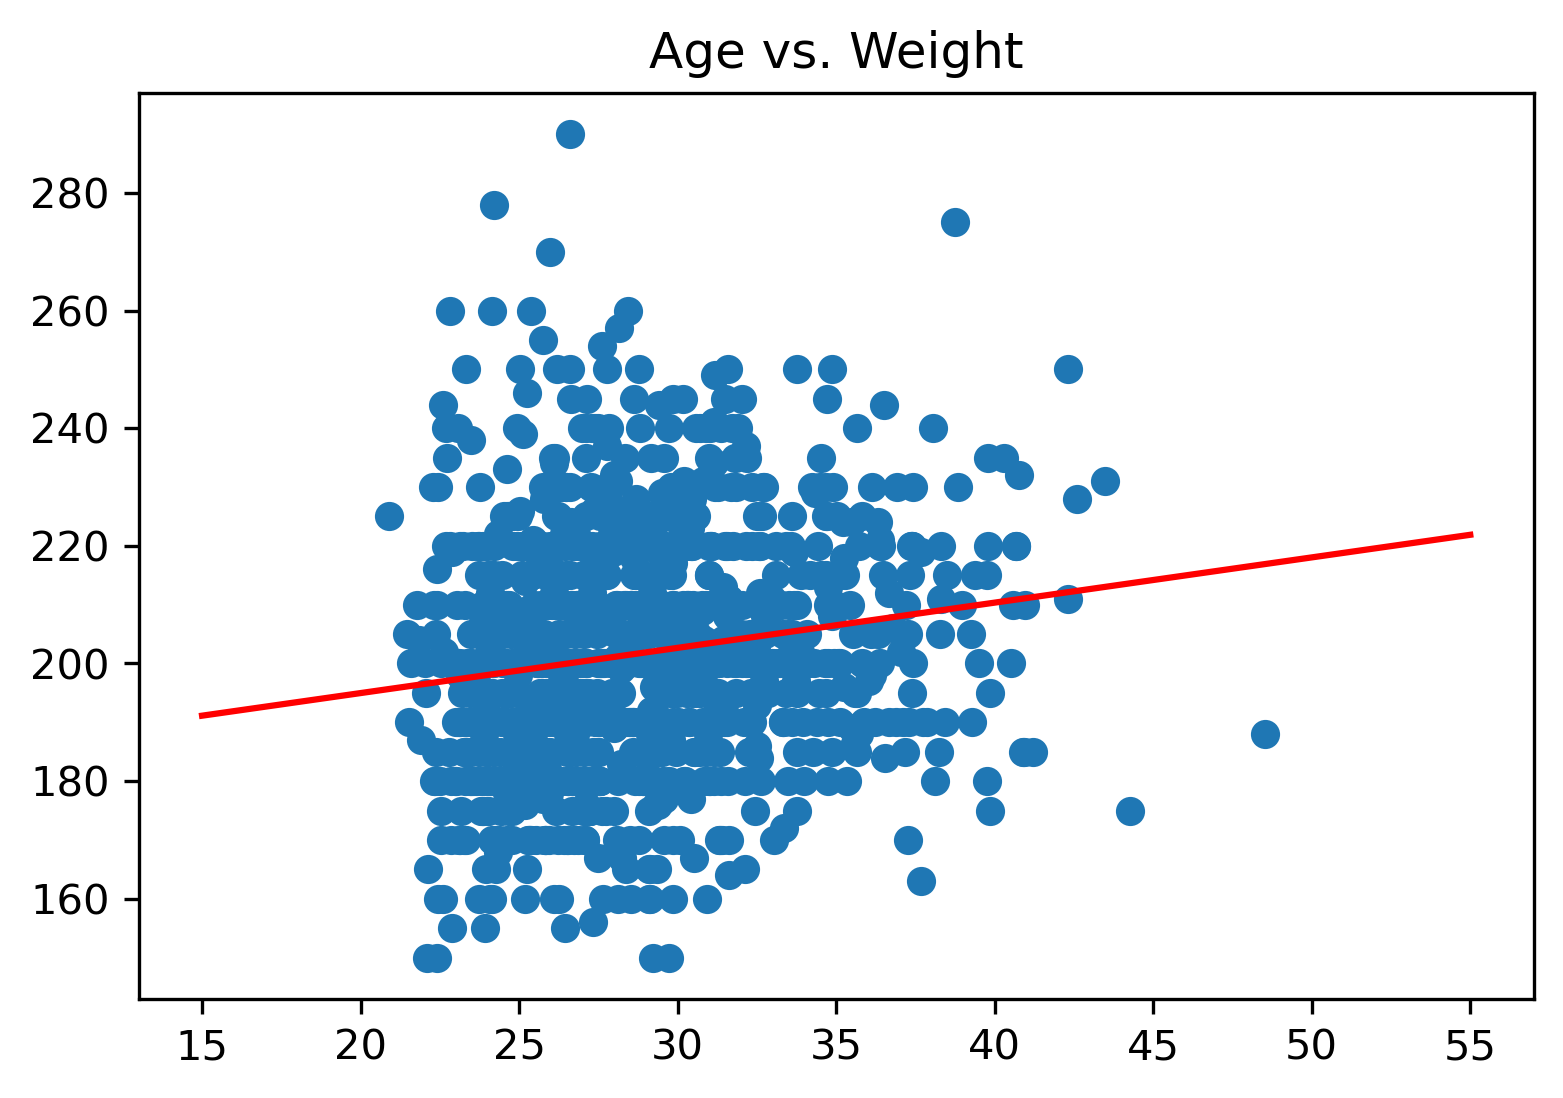

In [94]:
height, weight, age = np.load("MLB.npy").T

#Plot height
plt.hist(height, edgecolor="black")
plt.xlabel("Height (in)")
plt.ylabel("Number of players")
plt.title("Height frequencies of players")
plt.show()

#Plot height vs weight
t = np.linspace(60, 90, 100)
slope, y_int, rvalue, pvalue, stderr = la.linregress(height, weight)
plt.scatter(height, weight)
plt.plot(t, slope*t + y_int, c='r')
plt.title("Height vs. Weight")
plt.show()

#Plot age
plt.hist(age, edgecolor="black")
plt.xlabel("Age (years)")
plt.ylabel("Number of players")
plt.title("Age frequencies of players")
plt.show()

#Plot weight vs age
t = np.linspace(15, 55, 100)
slope, y_int, rvalue, pvalue, stderr = la.linregress(age, weight)
plt.scatter(age, weight)
plt.plot(t, slope*t + y_int, c='r')
plt.title("Age vs. Weight")
plt.show()

### Problem 4

The file `earthquakes.npy` contains data from over 17,000 earthquakes between 2000 and 2010 that were at least a 5 on the Richter scale.
Each row in the array represents a different earthquake; the columns are the earthquake’s date (as a fraction of the year), magnitude (on the Richter scale), longitude, and latitude, in that order.

Describe the data with two or three visualizations, including line plots, scatter plots, and histograms as appropriate.
Your plots should answer the following questions:
1. How many earthquakes happened every year?
2. How often do stronger earthquakes happen compared to weaker ones?
3. Where do earthquakes happen? Where do the strongest earthquakes happen?

Hint: Use `plt.axis("equal")` or `ax.set_aspect("equal")` to fix the aspect ratio, which may improve comparisons between longitude and latitude.

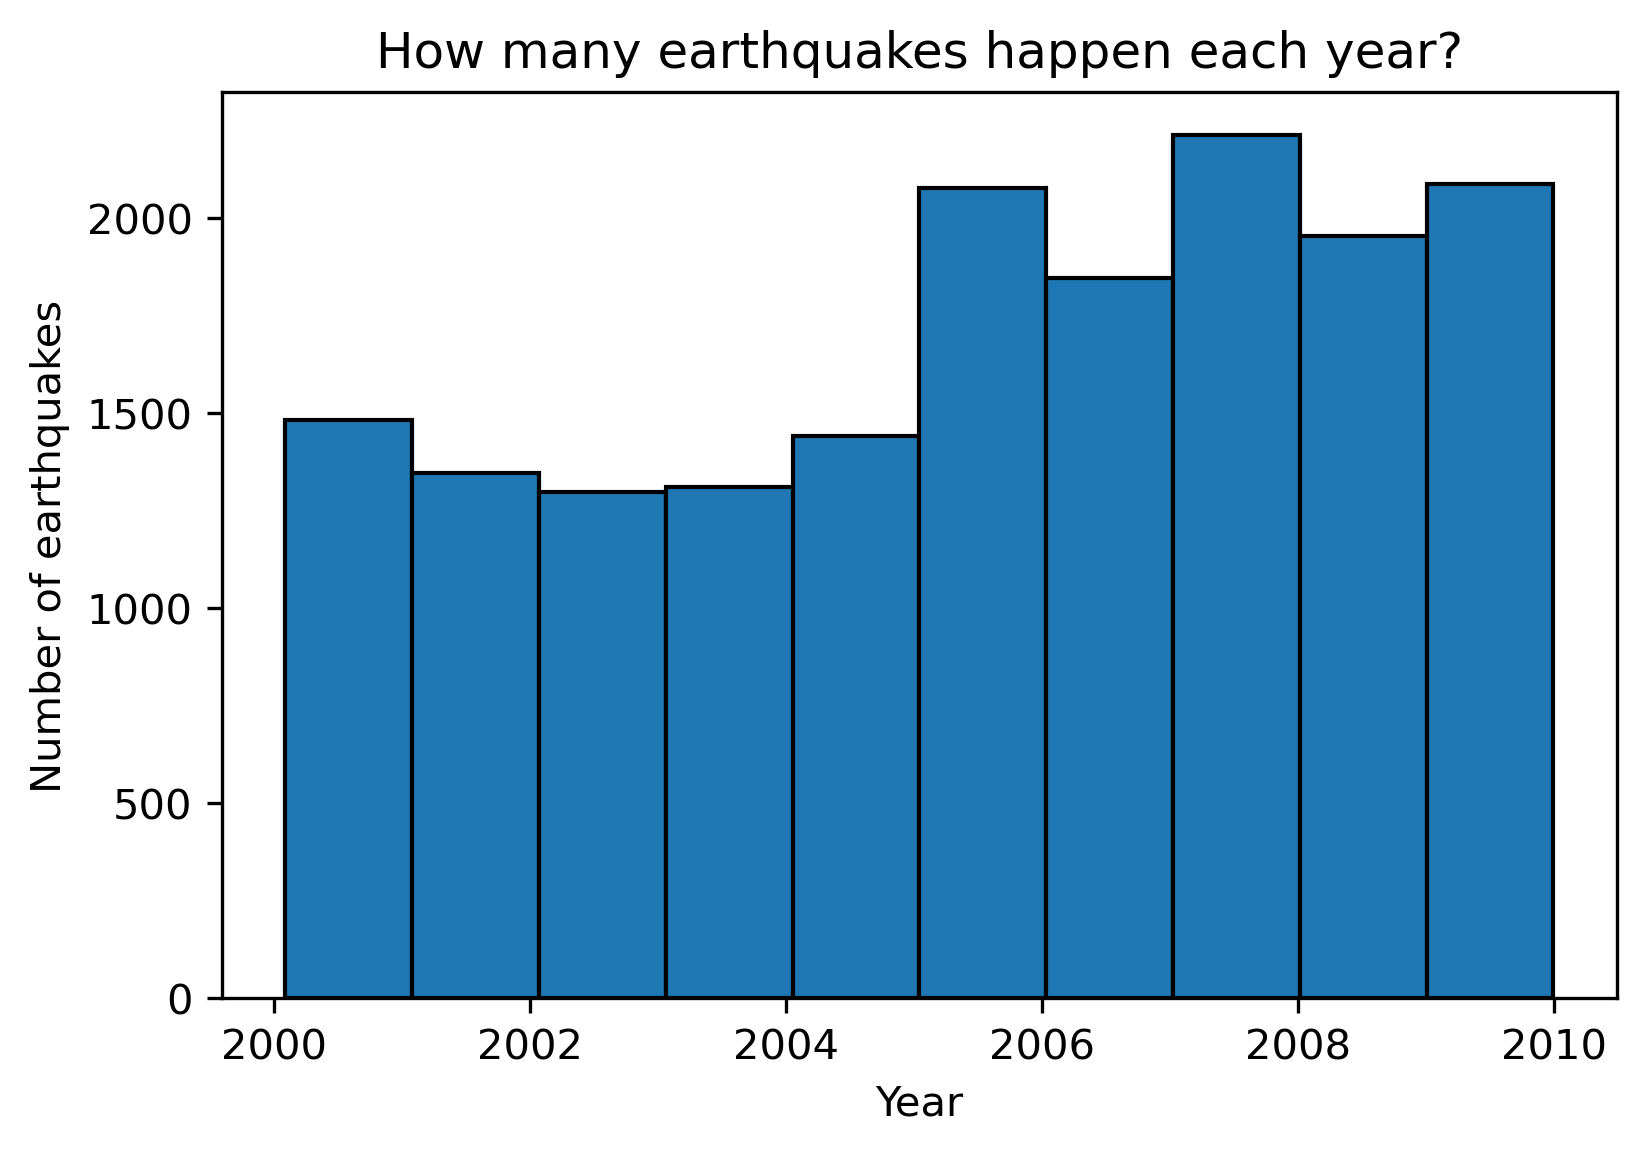

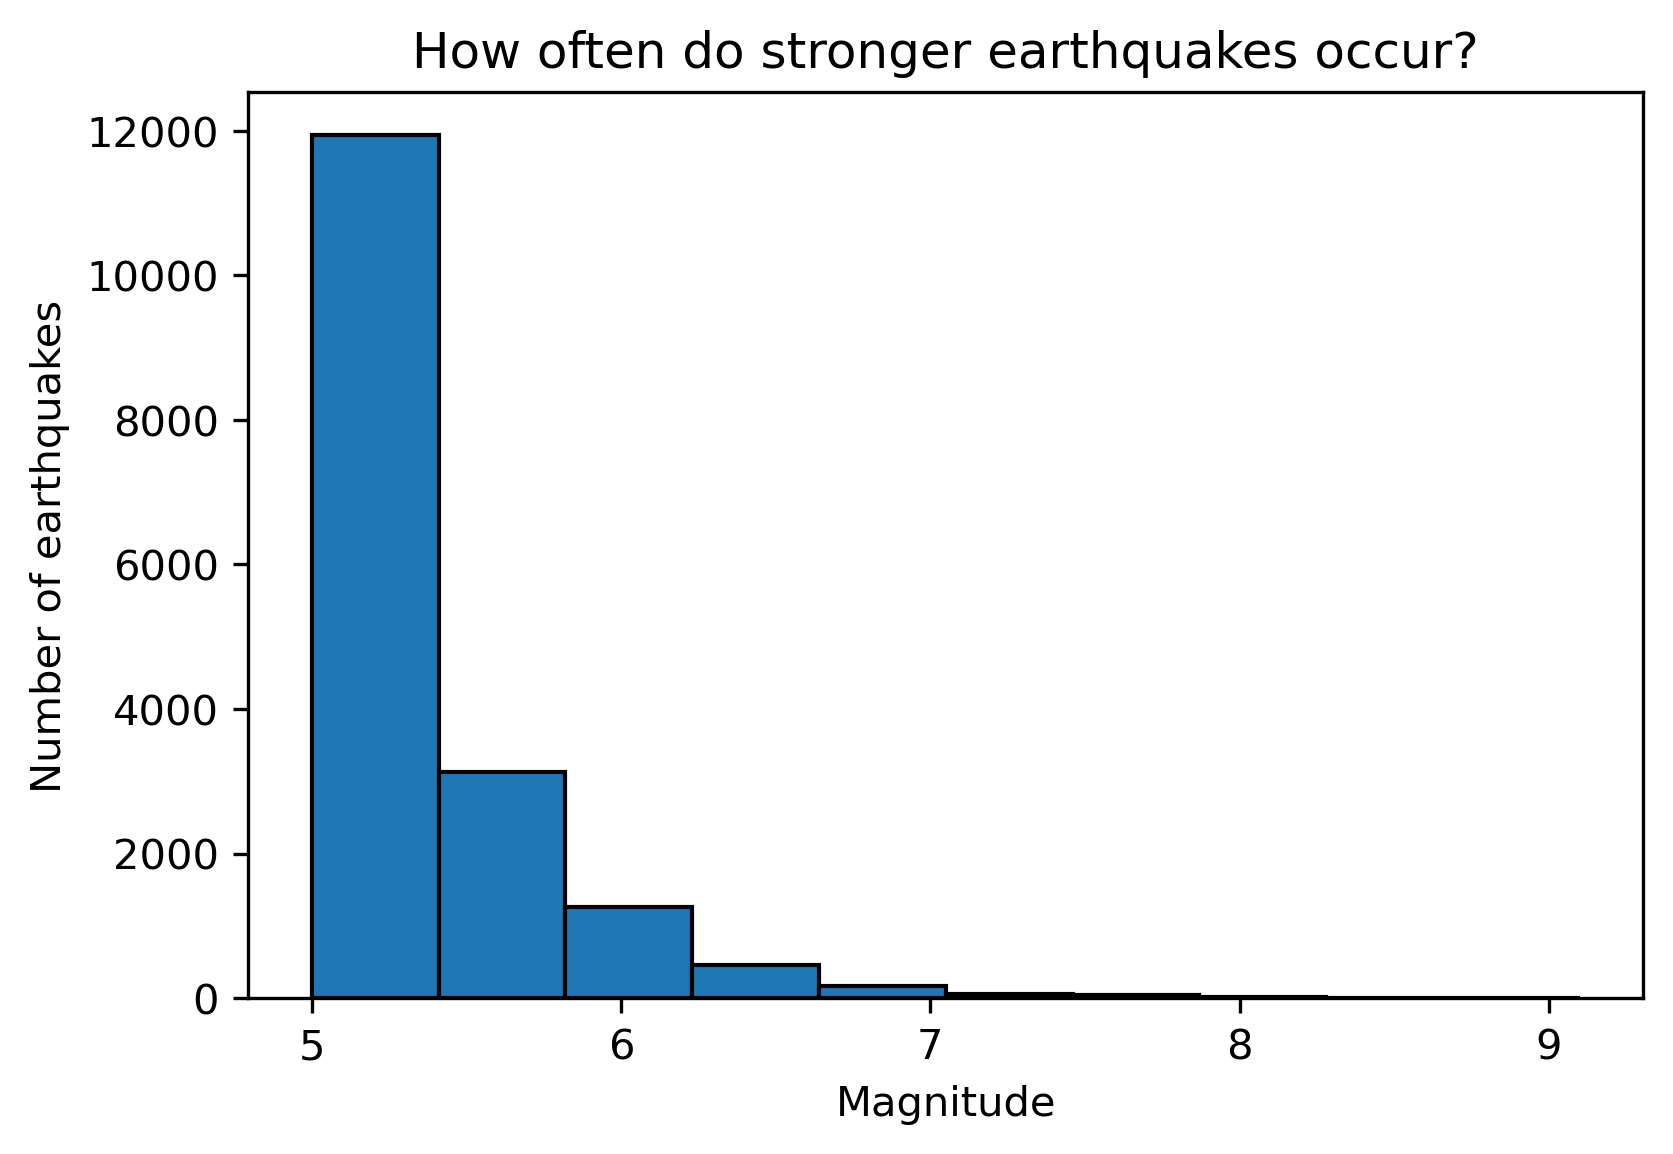

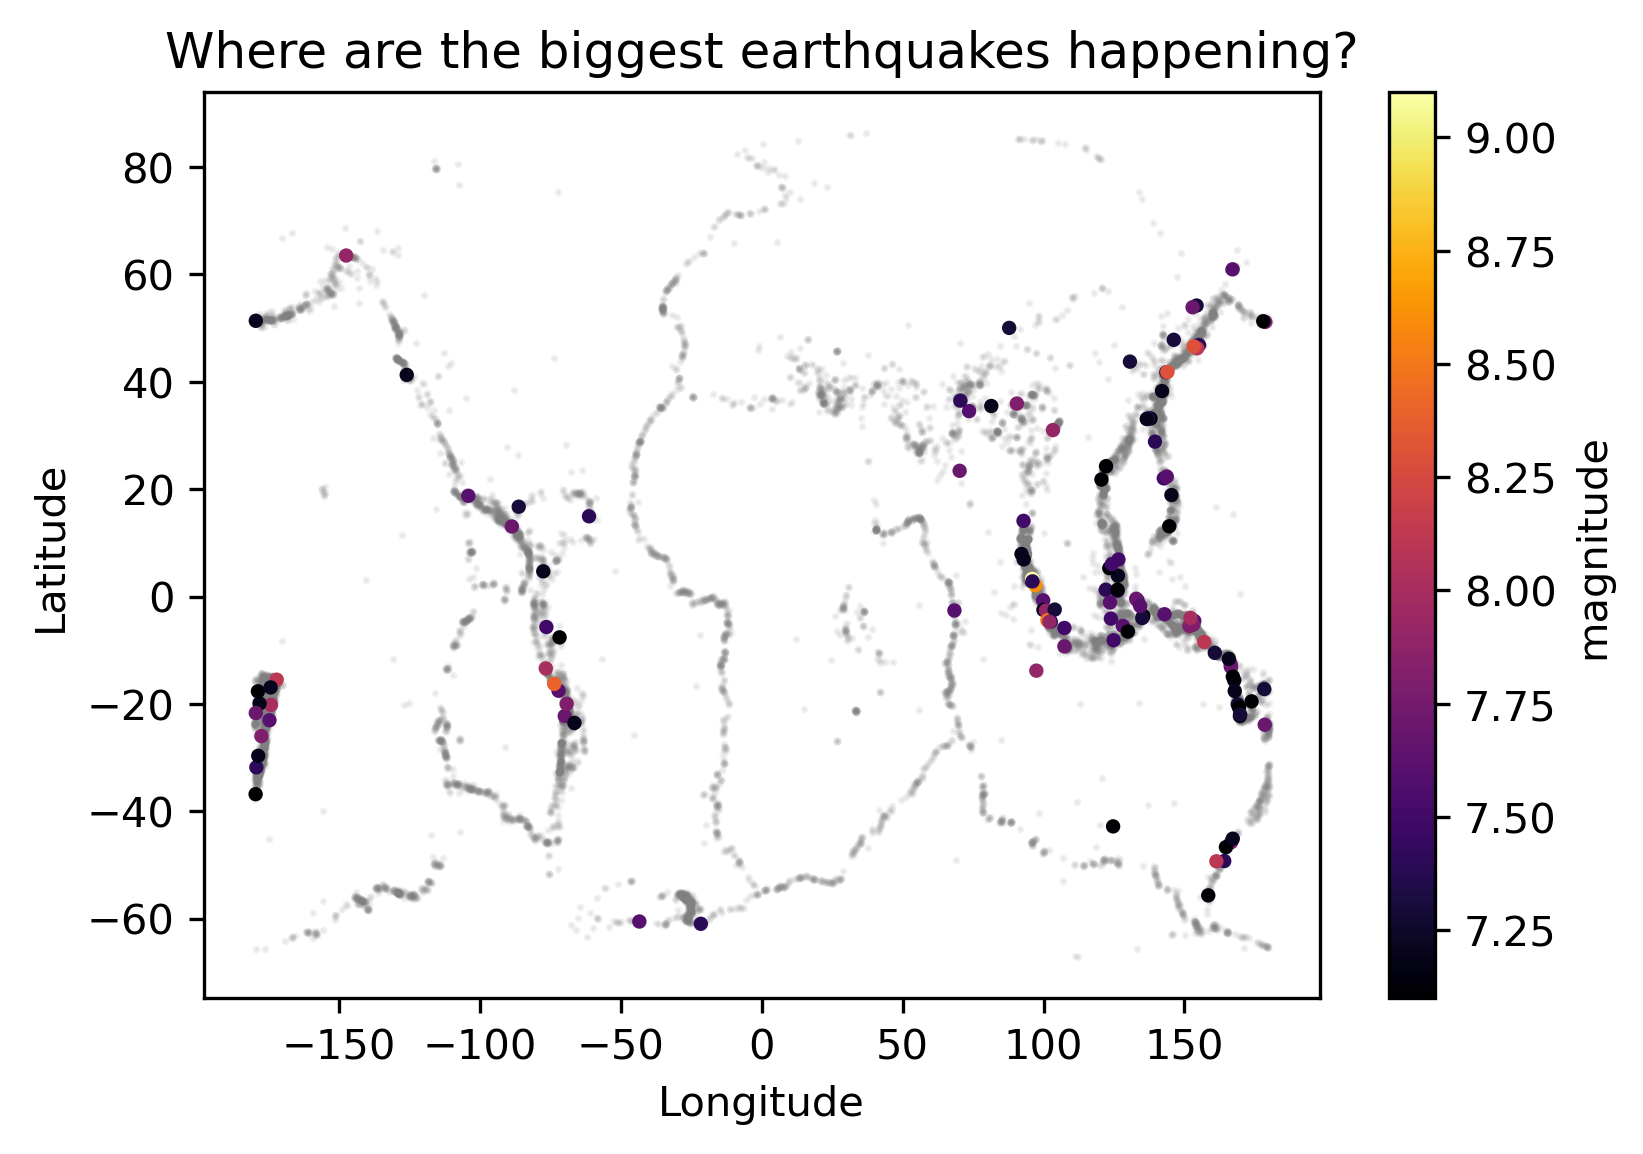

In [80]:
years, magnitudes, longitude, latitude = np.load("earthquakes.npy").T

#Plot how many earthquakes happen each year
plt.hist(years, bins=10, edgecolor="black")
plt.xlabel("Year")
plt.ylabel("Number of earthquakes")
plt.title("How many earthquakes happen each year?")
plt.show()

#Plot how many strong earthquakes happen
plt.hist(magnitudes, edgecolor="black")
plt.xlabel("Magnitude")
plt.ylabel("Number of earthquakes")
plt.title("How often do stronger earthquakes occur?")
plt.show()

#Plot where the earthquakes are happening
mask = magnitudes > 7
plt.scatter(longitude, latitude, alpha = 0.1, c = 'gray', s = .8)
plt.scatter(longitude[mask], latitude[mask], c=magnitudes[mask], s = 6, cmap='inferno')
plt.colorbar(label='magnitude')
plt.title("Where are the biggest earthquakes happening?")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Problem 5

The _Rosenbrock function_ is defined as follows. $$f(x,y)=(1−x)^2 +100(y−x^2)^2$$
The minimum value of $f$ is $0$, which occurs at the point $(1, 1)$ at the bottom of a steep, banana-shaped valley of the function.

Use a heat map and a contour plot to visualize the Rosenbrock function.
Plot the minimizer $(1, 1)$.
Use a different sequential colormap for each visualization.

<ipython-input-97-cd6da409c9bf>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, Z, cmap="viridis")


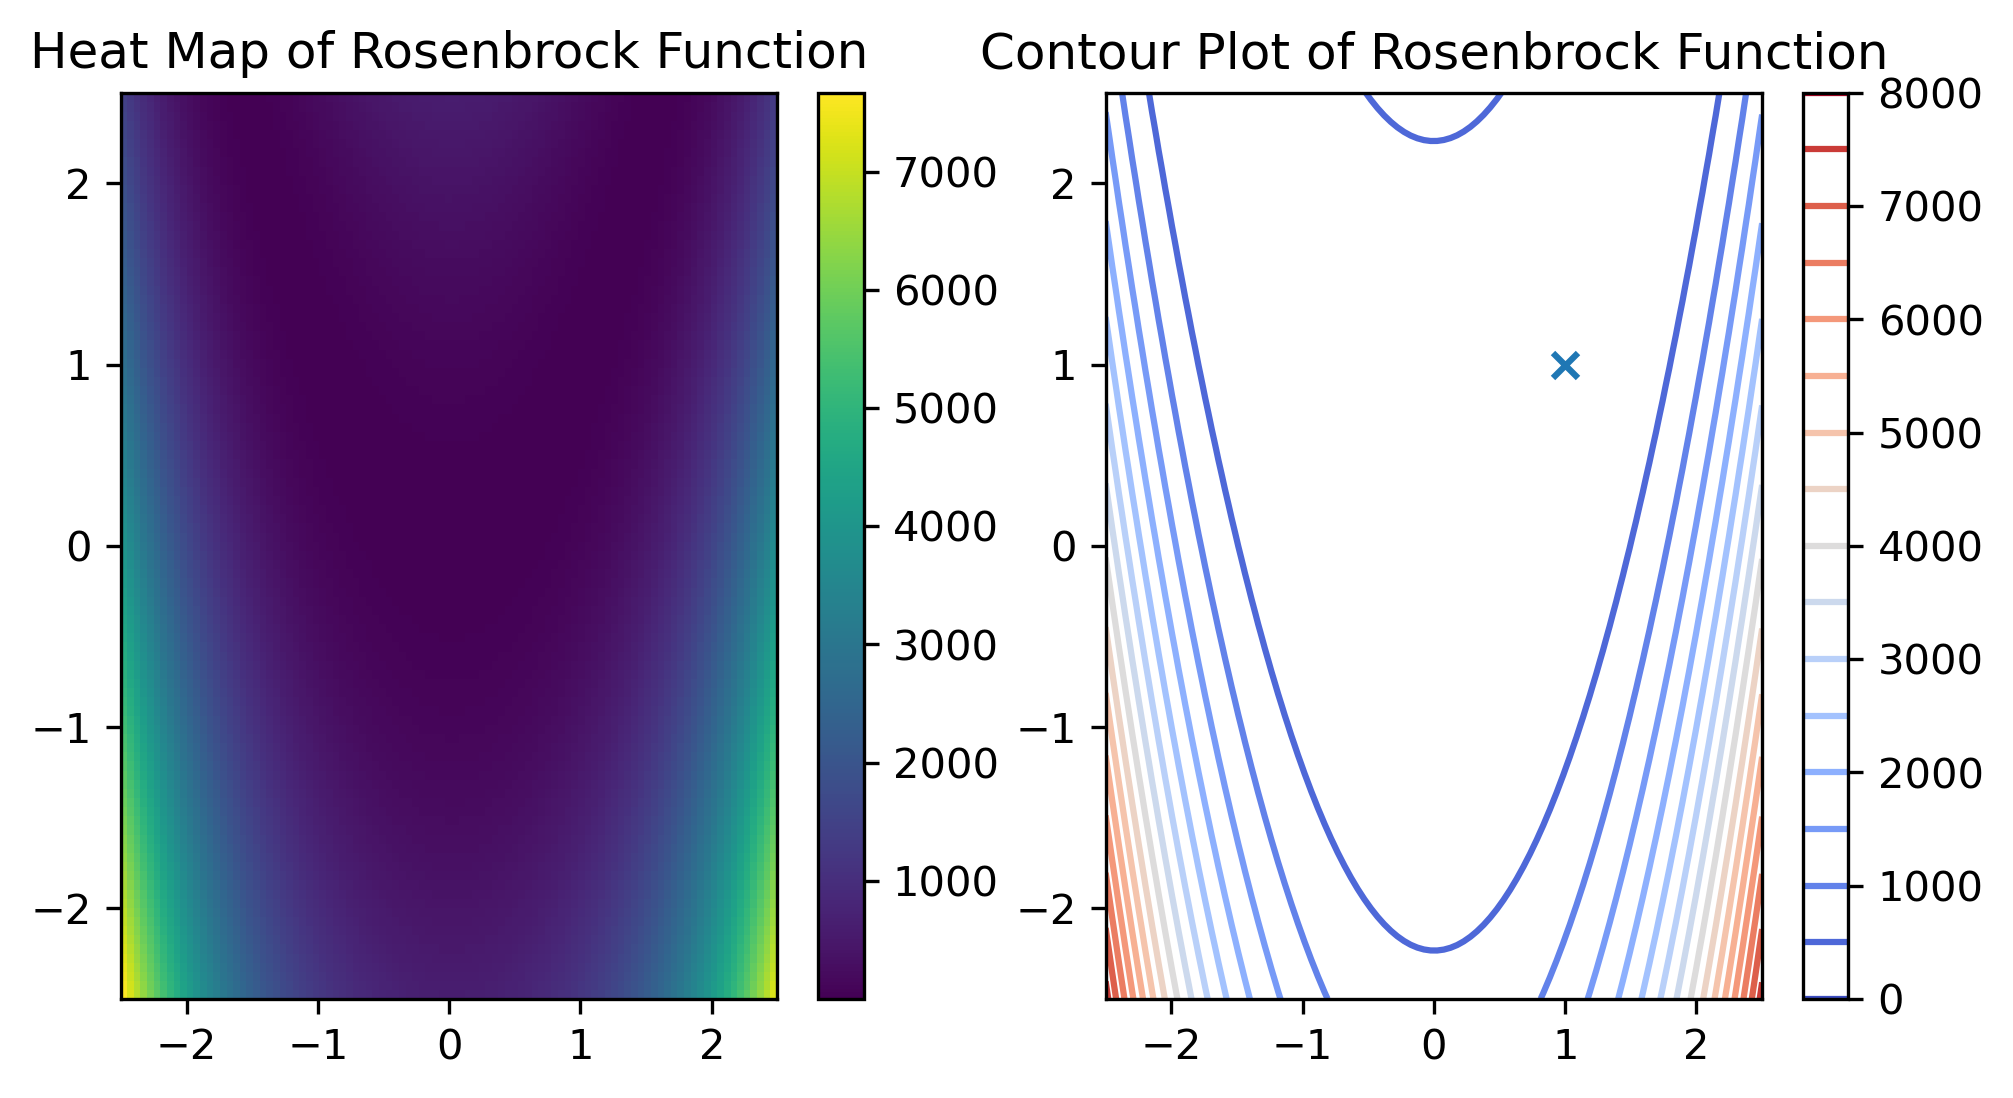

In [97]:
rosen = lambda x, y: (1 - x)**2 + 100 * (y - x**2)**2

# Create a 2-D domain with np.meshgrid().
x = np.linspace(-2.5, 2.5, 100)
y = x.copy()
X, Y = np.meshgrid(x, y)
Z = rosen(X, Y)

# Plot the heat map of rosen over the 2-D domain.
plt.subplot(131)
plt.pcolormesh(X, Y, Z, cmap="viridis")
plt.colorbar()
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.gcf().set_size_inches(12, 4)
plt.title("Heat Map of Rosenbrock Function")

# Plot a contour map
plt.subplot(132)
plt.contour(X, Y, Z, 15, cmap="coolwarm")
plt.ylim(-2.5, 2.5)
plt.title("Contour Plot of Rosenbrock Function")
plt.colorbar()

#Plot the minimizer
plt.scatter(1, 1, marker='x')

plt.show()

### Problem 6

The file `countries.npy` contains information from 20 different countries.
Each row in the array represents a different country; the columns are the 2015 population (in millions of people), the 2015 GDP (in billions of US dollars), the average male height (in centimeters), and the average female height (in centimeters), in that order.

Visualize this data set with at least four plots, using at least one scatter plot, one histogram, and one bar chart.
List the major insights that your visualizations reveal.

(Hint: consider using `np.argsort()` and fancy indexing to sort the data for the bar chart.)

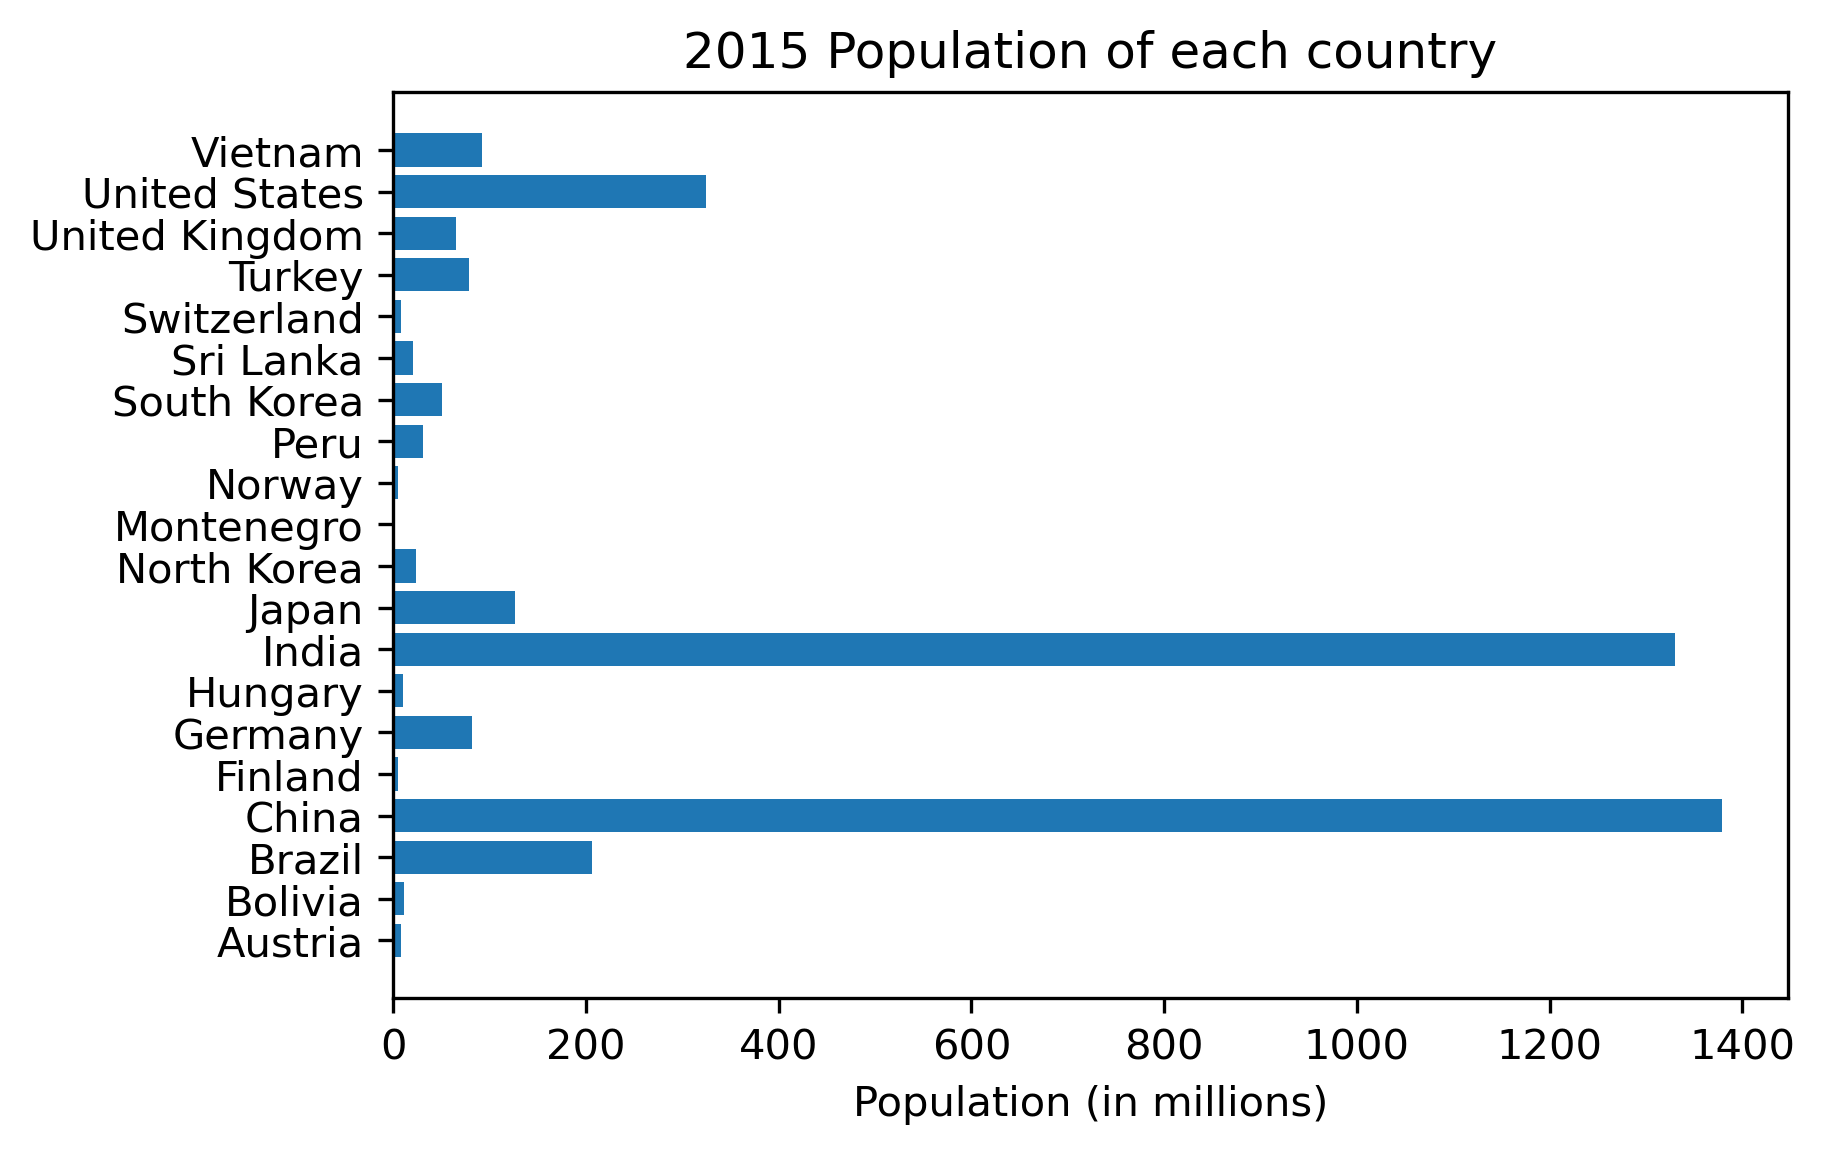

Plot 1 Insight: The US, India, China, and Brazil have the biggest populations.


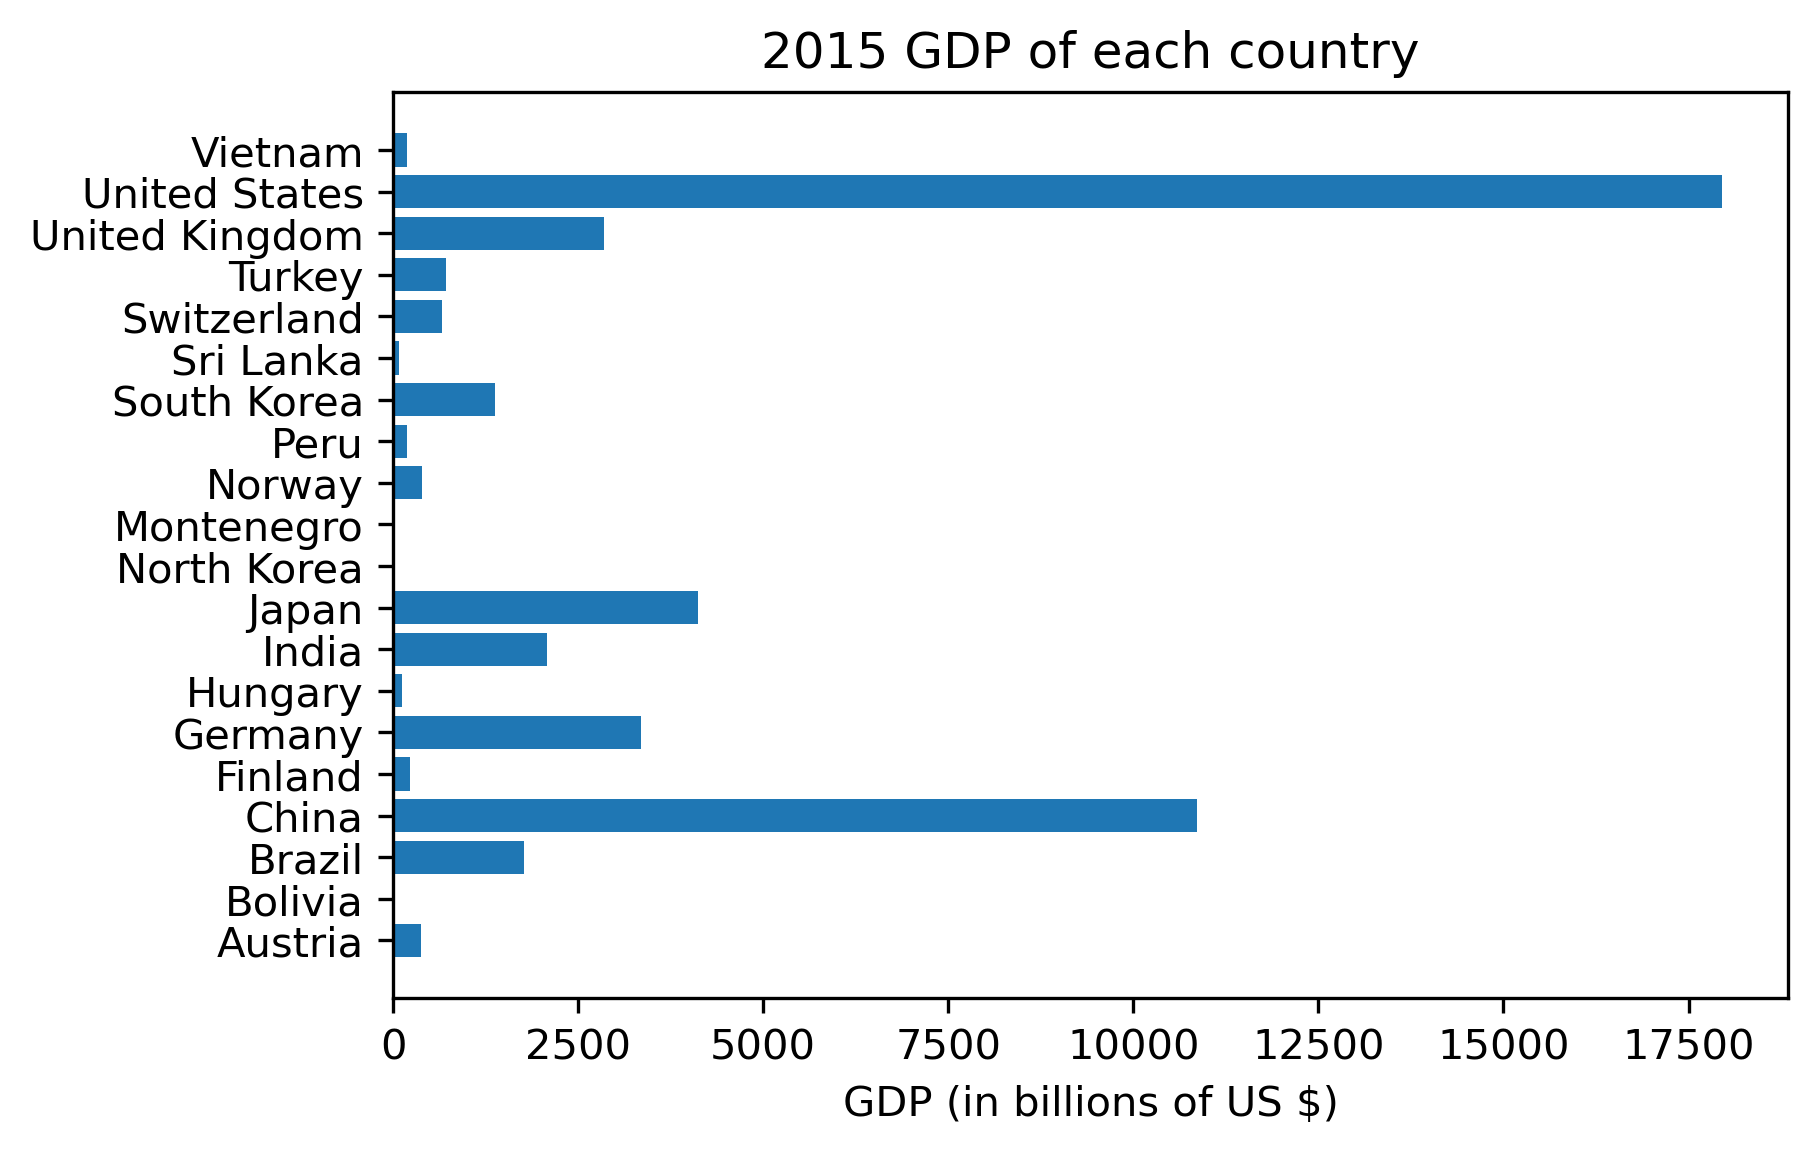

Plot 2 Insight: The US and China far exceed the other countries in GDP.


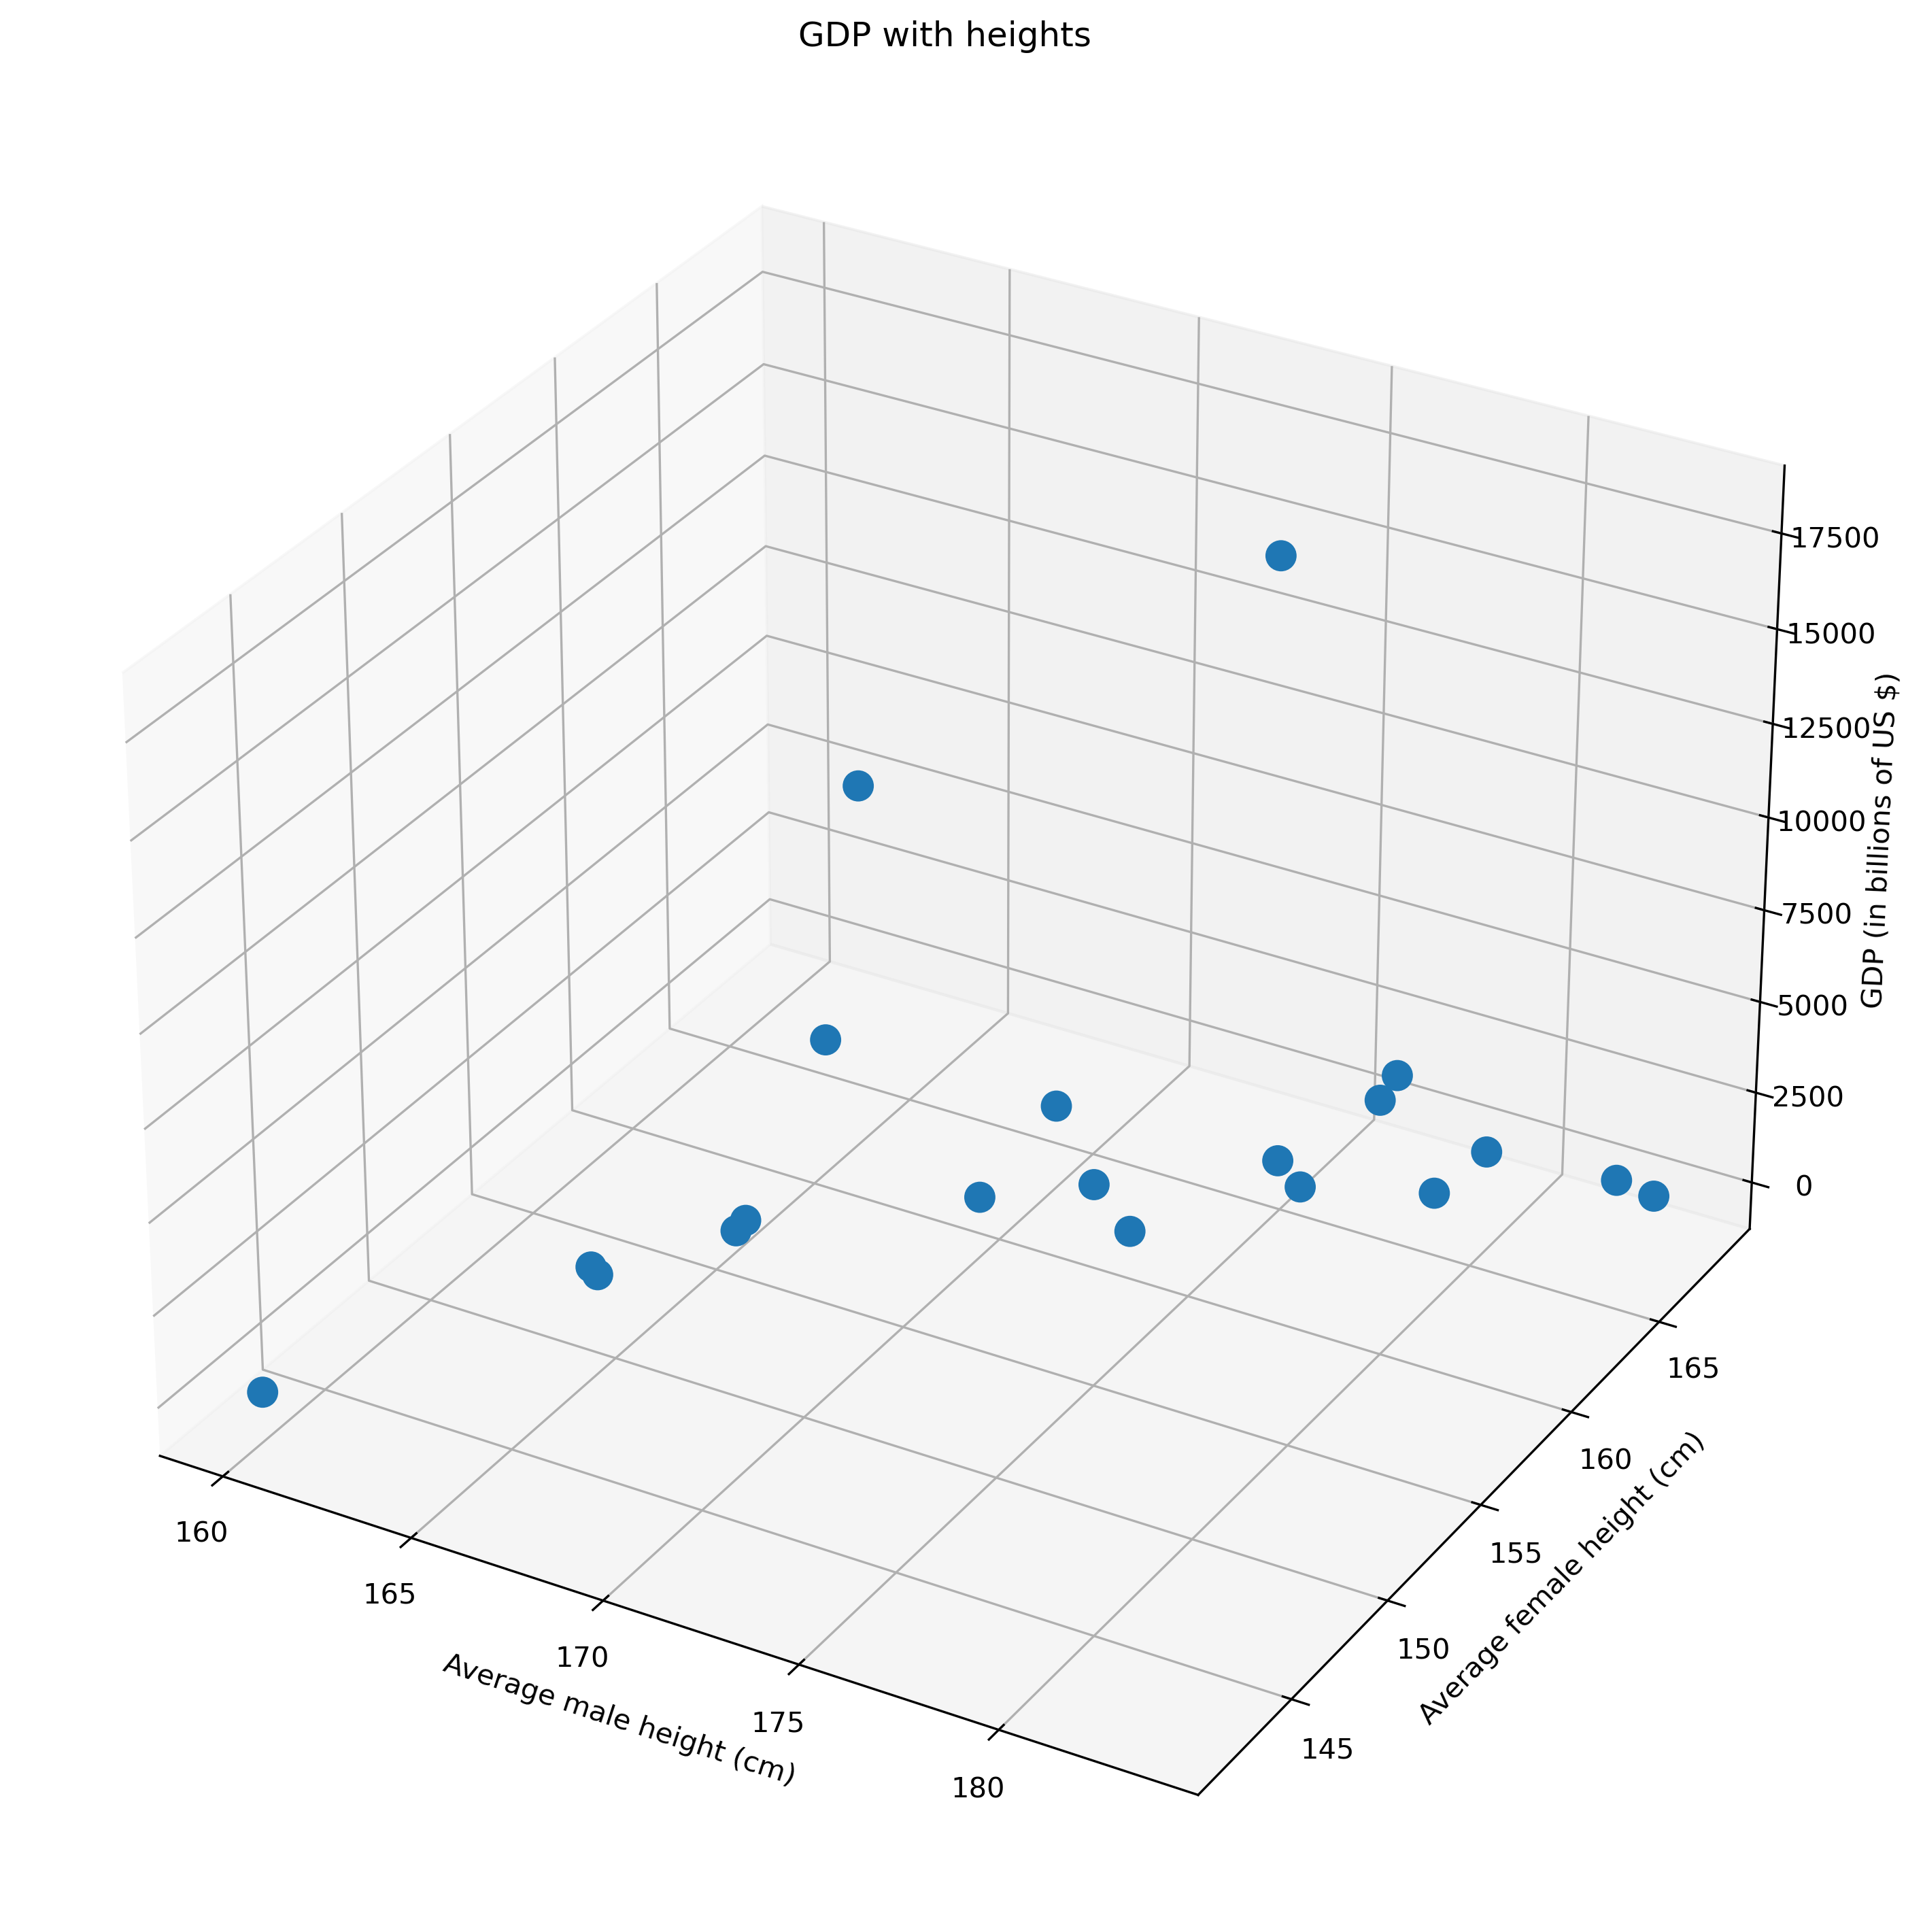

Plot 3 Insight: In general, as the male and femle average heights increase, so does the GDP.


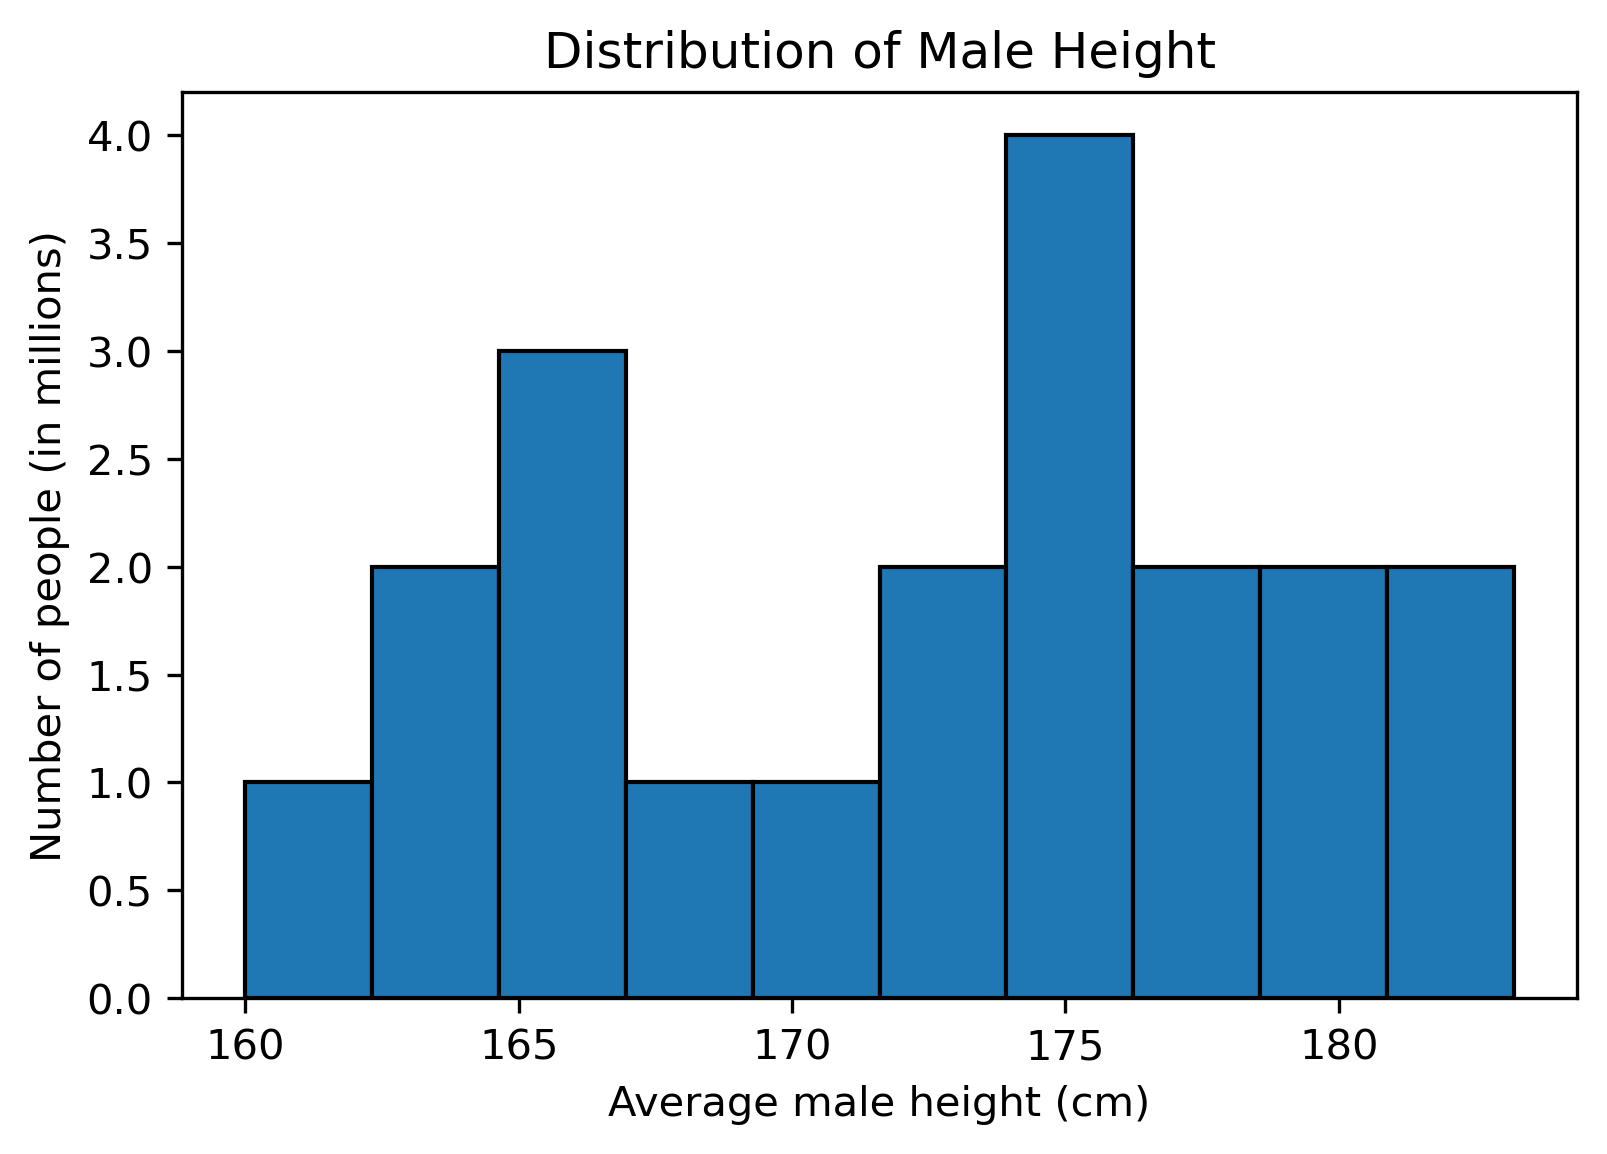

Plot 4 Insight: Most males are about 165 or 175 cm in height.


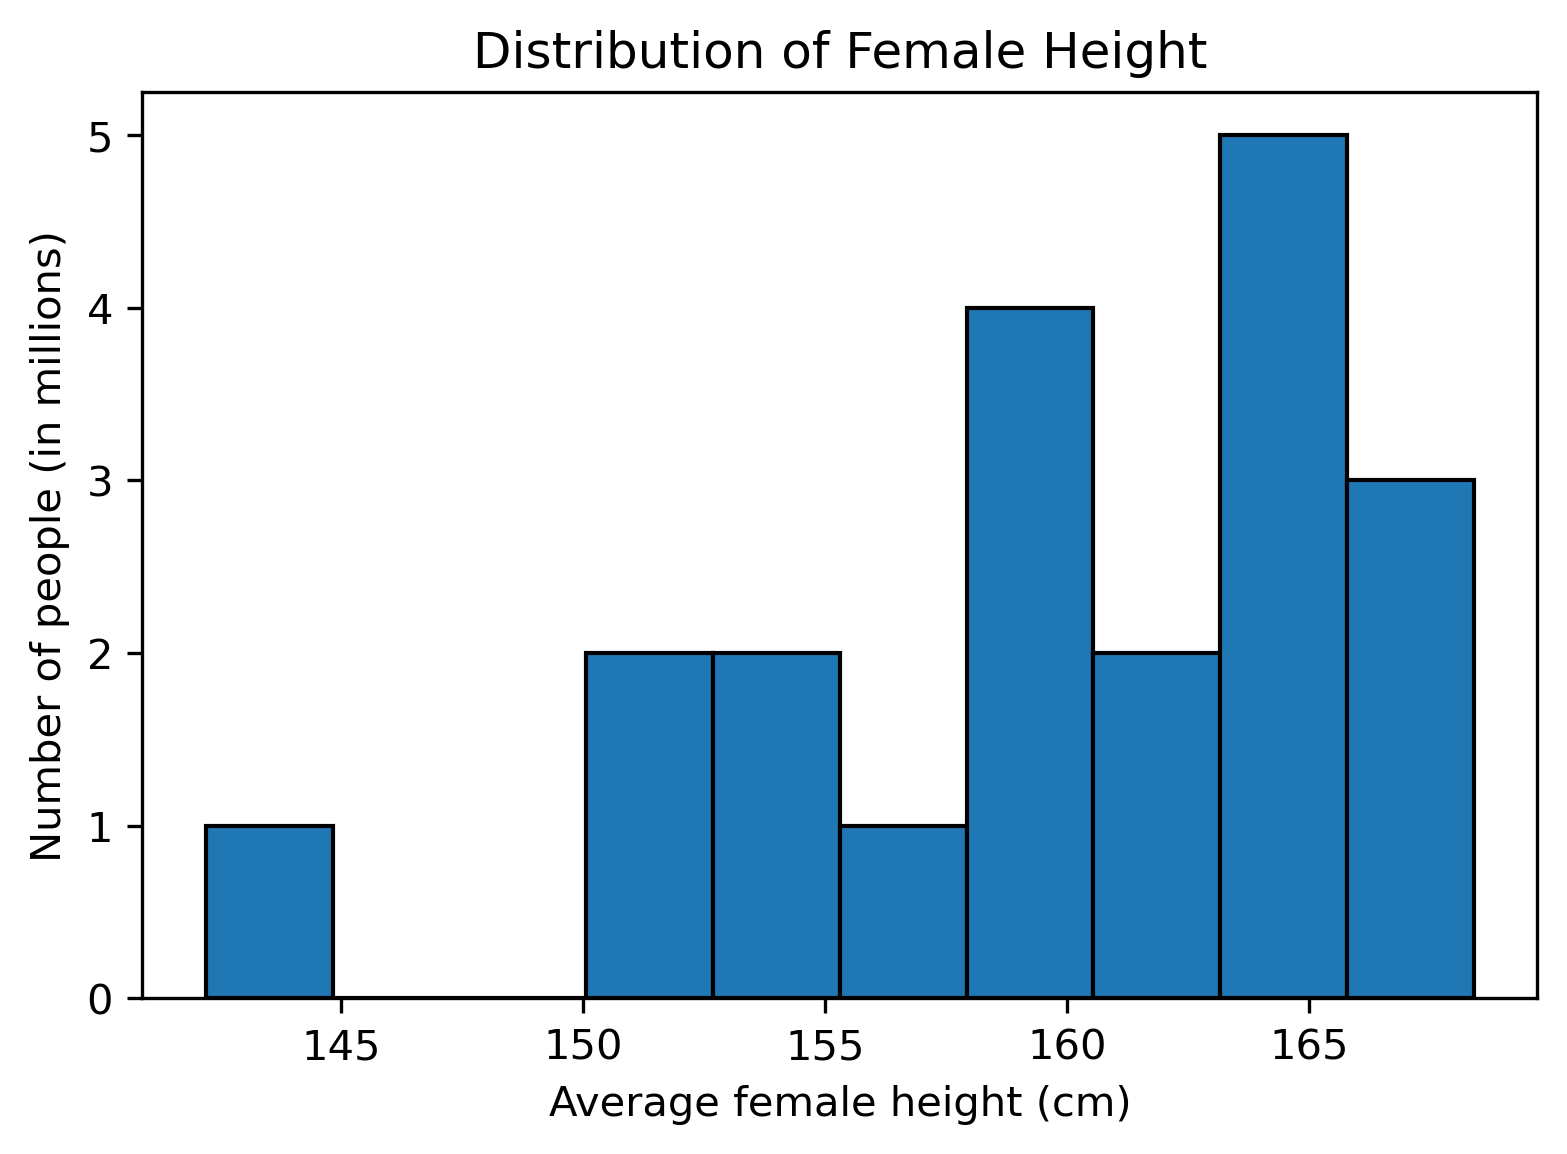

Plot 5 Insight: Most females are about 160 or 165 cm in height.


In [115]:
countries = np.array(
            ["Austria", "Bolivia", "Brazil", "China", "Finland",
             "Germany", "Hungary", "India", "Japan", "North Korea",
             "Montenegro", "Norway", "Peru", "South Korea", "Sri Lanka",
             "Switzerland", "Turkey", "United Kingdom", "United States", "Vietnam"])
population, gdp, male, female = np.load("countries.npy").T

positions = np.arange(len(countries))

#Visualize the populations for the countries
plt.barh(positions, population, align="center") 
plt.yticks(positions, countries)
plt.xlabel("Population (in millions)")
plt.title("2015 Population of each country")
plt.show()
print("Plot 1 Insight: The US, India, China, and Brazil have the biggest populations.")

#Visualize the GDP for the countries
plt.barh(positions, gdp, align="center") 
plt.yticks(positions, countries)
plt.xlabel("GDP (in billions of US $)")
plt.title("2015 GDP of each country")
plt.show()
print("Plot 2 Insight: The US and China far exceed the other countries in GDP.")

#Visualize the male and female heights with GDP
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
ax.scatter(male, female, gdp, alpha=1, s=100)
ax.set_xlabel("Average male height (cm)")
ax.set_ylabel("Average female height (cm)")
ax.set_zlabel("GDP (in billions of US $)")
ax.set_title("GDP with heights")
plt.show()
print("Plot 3 Insight: In general, as the male and femle average heights increase, so does the GDP.")

#Visualize the distribution of average male heights
plt.hist(male, edgecolor="black")
plt.xlabel("Average male height (cm)")
plt.ylabel("Number of people (in millions)")
plt.title("Distribution of Male Height")
plt.show()
print("Plot 4 Insight: Most males are about 165 or 175 cm in height.")

#Visualize the distribution of average female heights
plt.hist(female, edgecolor="black")
plt.xlabel("Average female height (cm)")
plt.ylabel("Number of people (in millions)")
plt.title("Distribution of Female Height")
plt.show()
print("Plot 5 Insight: Most females are about 160 or 165 cm in height.")